I decided to investigate FBI Gun Data. The data comes from the FBI's National Instant Criminal Background Check System. The NICS is used by to determine whether a prospective buyer is eligible to buy firearms or explosives. Gun shops call into this system to ensure that each customer does not have a criminal record or isn’t otherwise ineligible to make a purchase. I took the latest data with the entire 2017.<br>
The second data is a census data 2010-2017.
Questions I want to find out:<br>
Which the ratio between background checks and population of each state?<br>
Which states have had the highest growth in gun registrations?<br>
Which states have had the highest growth in handgun purchases?<br>
Which states have had the highest growth in longun purchases?<br>
What is the trend of handgun and longgun purchases?<br>
What is the overall trend of gun purchases?<br>


In [319]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In this project I divided the data into 2 groups: handgun and long gun background checks. I am strognly belive that the reason why people buy handguns and long guns are not the same at all. 

In [320]:
months_activity=pd.read_csv('gun_data_new.csv')

In [321]:
census_data=pd.read_csv('census_data_2010-2017.csv',thousands=",")

Check all states in the census data.

In [322]:
print len(census_data['State']) #the ouput should be 51. 50 states+District of Columbia
states_in_census_data=np.array(census_data['State']) #all states together from census data
states_in_census_data

52


array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri',
       'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey',
       'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio',
       'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin',
       'Wyoming', 'Puerto Rico'], dtype=object)

Cleaning data. I decided to delete Puerto Rico because we want to investigate the data only within the USA.

In [323]:
census_data=census_data[census_data.State != 'Puerto Rico']
len(census_data)

51

50 states + District of Columbia as expected.

Let's check if the number of states same as in the census data.

In [324]:
len(months_activity['state'].unique())

55

As we can see there are 55 states instead of 51, let's find the difference

In [325]:
states_in_census_data=np.array(census_data['State']) #array of states in census_data_2010-2017.csv
states_in_gun_data=months_activity['state'].unique() #array of states in gun_data_new.csv
np.setdiff1d(states_in_gun_data,states_in_census_data) #check diffrent states

array(['Guam', 'Mariana Islands', 'Puerto Rico', 'Virgin Islands'], dtype=object)

Cleaning data. 
That's mean this states: 'Guam', 'Mariana Islands', 'Puerto Rico', 'Virgin Islands' are not included in 'census_data_2010-2017.csv'.
I decided to delete them from the data.

In [326]:
states_for_investigation=census_data['State'].values #We have got this states from census data.
months_activity=months_activity[months_activity['state'].isin(states_for_investigation)]
len(months_activity['state'].unique())

51

50 states + District of Columbia as expected.

In [327]:
census_data.head()

,State,2010,2011,2012,2013,2014,2015,2016,2017
0,Alabama,4785579,4798649,4813946,4827660,4840037,4850858,4860545,4874747
1,Alaska,714015,722259,730825,736760,736759,737979,741522,739795
2,Arizona,6407002,6465488,6544211,6616124,6706435,6802262,6908642,7016270
3,Arkansas,2921737,2938640,2949208,2956780,2964800,2975626,2988231,3004279
4,California,37327690,37672654,38019006,38347383,38701278,39032444,39296476,39536653


I've decided to change indexes for both data frame. By default it was 0,1,2,3,4, etc and now we're going to turn into states.

In [328]:
census_data=census_data.rename(index=str, columns={'State': 'state'}) #changing column name from 'State' to 'state'.
census_data=census_data.set_index('state')
census_data.columns = [year for year in range(2010,2018)]   #Changing type of columns name. From str '2010' to int 2010
census_data

,2010,2011,2012,2013,2014,2015,2016,2017
state,,,,,,,,
Alabama,4785579,4798649,4813946,4827660,4840037,4850858,4860545,4874747
Alaska,714015,722259,730825,736760,736759,737979,741522,739795
Arizona,6407002,6465488,6544211,6616124,6706435,6802262,6908642,7016270
Arkansas,2921737,2938640,2949208,2956780,2964800,2975626,2988231,3004279
California,37327690,37672654,38019006,38347383,38701278,39032444,39296476,39536653
Colorado,5048029,5116411,5186330,5262556,5342311,5440445,5530105,5607154
Connecticut,3580171,3591927,3597705,3602470,3600188,3593862,3587685,3588184
Delaware,899712,907884,916868,925114,934805,944107,952698,961939
District of Columbia,605040,620336,635630,650114,660797,672736,684336,693972


Adding column "year".
It will be helpful as we want to calculate sum of handgun and long_gun background checks each year for each state

In [329]:
months_activity['month'] = pd.to_datetime(months_activity['month'])
months_activity['year'] = months_activity['month'].dt.year

In [330]:
months_activity.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,year
0,2017-12-01,Alabama,24496.0,0.0,12895.0,15765.0,390.0,513,0.0,16.0,...,0.0,0.0,37.0,29.0,4.0,0.0,0.0,0.0,56545,2017
1,2017-12-01,Alaska,249.0,3.0,3675.0,3524.0,287.0,174,0.0,4.0,...,0.0,0.0,16.0,27.0,4.0,0.0,0.0,0.0,8330,2017
2,2017-12-01,Arizona,6243.0,415.0,17566.0,12840.0,1414.0,784,0.0,14.0,...,0.0,0.0,41.0,25.0,3.0,1.0,1.0,1.0,41559,2017
3,2017-12-01,Arkansas,3339.0,590.0,9189.0,13104.0,347.0,440,40.0,8.0,...,0.0,0.0,23.0,32.0,4.0,0.0,0.0,0.0,29559,2017
4,2017-12-01,California,53885.0,0.0,47613.0,35240.0,4885.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,142492,2017


Let's calculate sum of handgun and long_gun background checks per year (1998-2017) into 2 series.


In [331]:
hand_gun_total_checks=months_activity.groupby(['year','state']).sum()['handgun']
long_gun_total_checks=months_activity.groupby(['year','state']).sum()['long_gun']
multiple_total_checks=months_activity.groupby(['year','state']).sum()['multiple']
print hand_gun_total_checks.head()
print long_gun_total_checks.head()
print multiple_total_checks.head()

year  state     
1998  Alabama       10567.0
      Alaska         1365.0
      Arizona        7157.0
      Arkansas       4649.0
      California    28641.0
Name: handgun, dtype: float64
year  state     
1998  Alabama       25723.0
      Alaska         2555.0
      Arizona        8275.0
      Arkansas      16914.0
      California    33438.0
Name: long_gun, dtype: float64
year  state     
1998  Alabama       278
      Alaska         61
      Arizona       278
      Arkansas      189
      California      0
Name: multiple, dtype: int64


Creating 2 DataFrames for handgun and long_gun background checks which will be similar to census_data.
We will take only the data from 2010 to 2017 because the census data available only for this years.

In [332]:
def creating_data_frame(total_checks,start_year,end_year):
    result=pd.DataFrame(index=months_activity['state'].unique())
    for year in range(start_year,end_year+1):
        result[year]=total_checks[year]
    return result

In [333]:
handgun_data=creating_data_frame(hand_gun_total_checks,2010,2017)
long_gun_data=creating_data_frame(long_gun_total_checks,2010,2017)

print handgun_data.head()
print long_gun_data.head()

                2010      2011      2012      2013      2014      2015  \
Alabama     116963.0  130490.0  177239.0  195052.0  178355.0  243734.0   
Alaska       25720.0   28291.0   35851.0   36678.0   35694.0   37086.0   
Arizona      89162.0  108245.0  139050.0  138744.0  123375.0  148400.0   
Arkansas     49992.0   54659.0   69481.0   74884.0   60520.0   77394.0   
California  245159.0  303169.0  375569.0  407355.0  495962.0  477822.0   

                2016      2017  
Alabama     153123.0   97751.0  
Alaska       37491.0   34556.0  
Arizona     166784.0  153522.0  
Arkansas     80244.0   72100.0  
California  560355.0  512465.0  
                2010      2011      2012      2013      2014      2015  \
Alabama     136519.0  146290.0  184072.0  203530.0  170815.0  176075.0   
Alaska       33177.0   34607.0   40505.0   44001.0   39625.0   36372.0   
Arizona      69067.0   81285.0  107079.0  110309.0   91086.0   93155.0   
Arkansas     72206.0   78806.0   94539.0   94837.0   82670.0 

Now we want to know the ratio of background checks to the population of each state.
We are going to divide background checks by a population of a state. 
We have two exactly the same data frame structure for both: background checks and census data.

In [334]:
ratio_background_checks_handgun=handgun_data.div(census_data)
ratio_background_checks_handgun # handgun
ratio_background_checks_long_gun=long_gun_data.div(census_data)
ratio_background_checks_long_gun #long_gun

,2010,2011,2012,2013,2014,2015,2016,2017
Alabama,0.028527,0.030486,0.038237,0.042159,0.035292,0.036298,0.025092,0.017685
Alaska,0.046465,0.047915,0.055424,0.059722,0.053783,0.049286,0.049745,0.044131
Arizona,0.010780,0.012572,0.016362,0.016673,0.013582,0.013695,0.015776,0.014145
Arkansas,0.024713,0.026817,0.032056,0.032074,0.027884,0.027926,0.027481,0.025552
California,0.007379,0.008520,0.011131,0.013722,0.009535,0.008791,0.014112,0.008047
Colorado,0.025682,0.028568,0.032965,0.035727,0.029212,0.029984,0.032554,0.029782
Connecticut,0.011325,0.011536,0.015007,0.015949,0.016519,0.013453,0.012212,0.007209
Delaware,0.010521,0.011755,0.015131,0.017753,0.020615,0.021230,0.022826,0.019144
District of Columbia,0.000018,0.000015,0.000028,0.000057,0.000045,0.000048,0.000070,0.000065
Florida,0.009905,0.011123,0.015345,0.016670,0.013807,0.013704,0.015309,0.013277


I have decided to delete 'Hawaii' because according to the data, this state doesn't give us any information.

In [335]:
ratio_background_checks_handgun=ratio_background_checks_handgun.drop(['Hawaii'])
ratio_background_checks_long_gun=ratio_background_checks_long_gun.drop(['Hawaii'])

Creating a new function "plotting_state" which creates a plot for the state.
And now we are ready to show trends in gun background checks(handgun) in each state from 2010 to 2017.
Let's check what we can find.

I want to see how a trend of each state changed from 2010 to 2017 and which conclusion I can make.

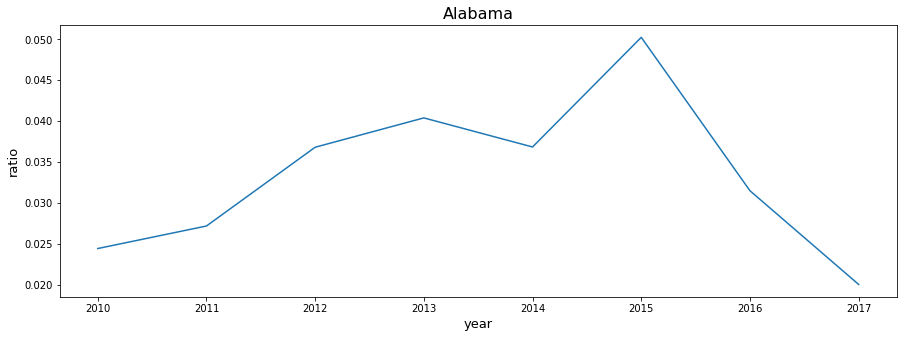

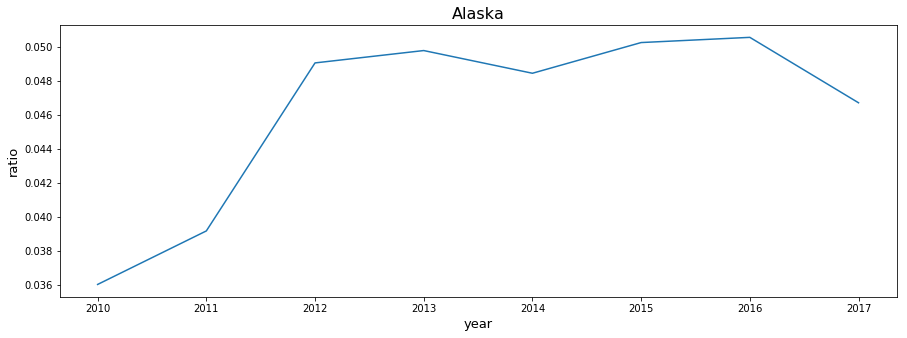

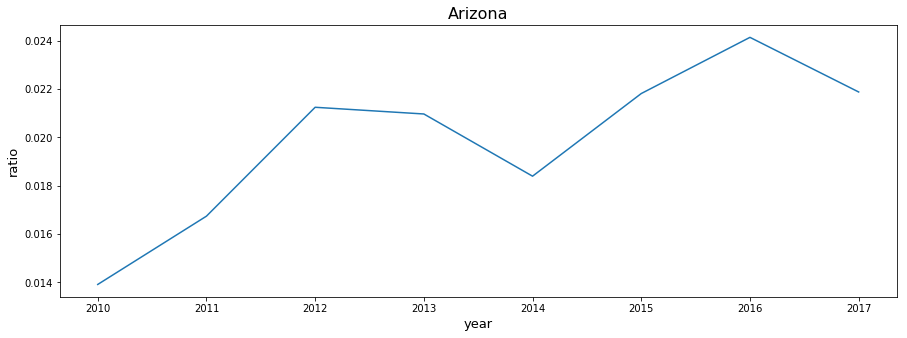

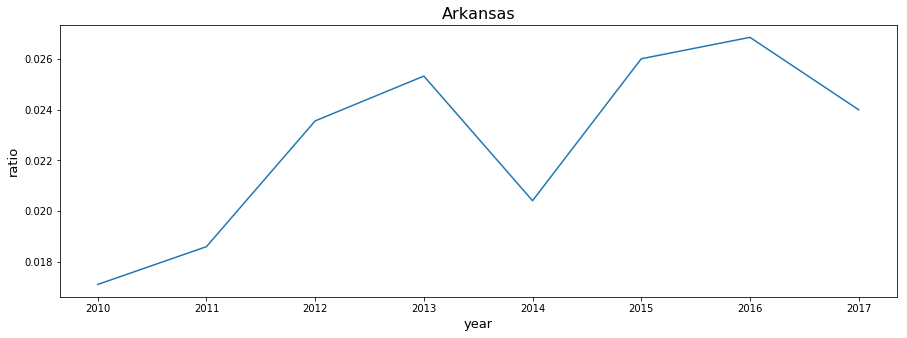

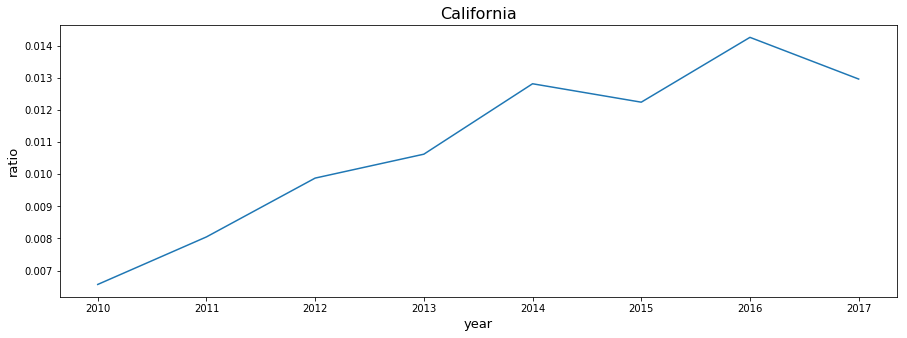

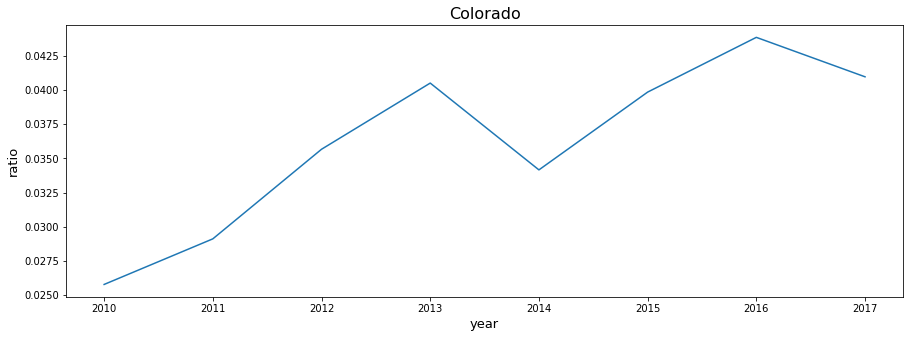

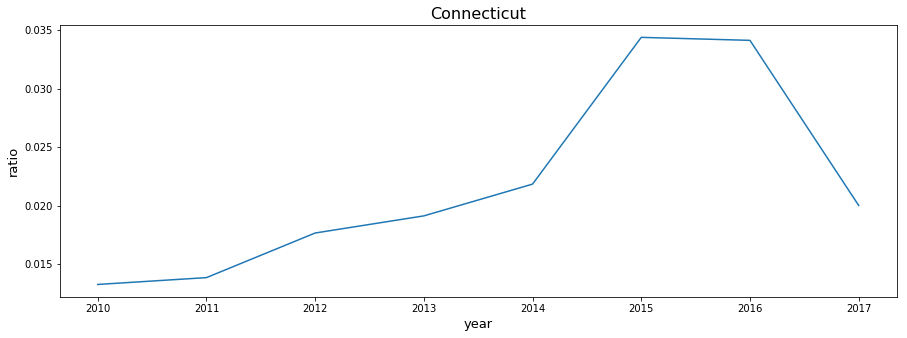

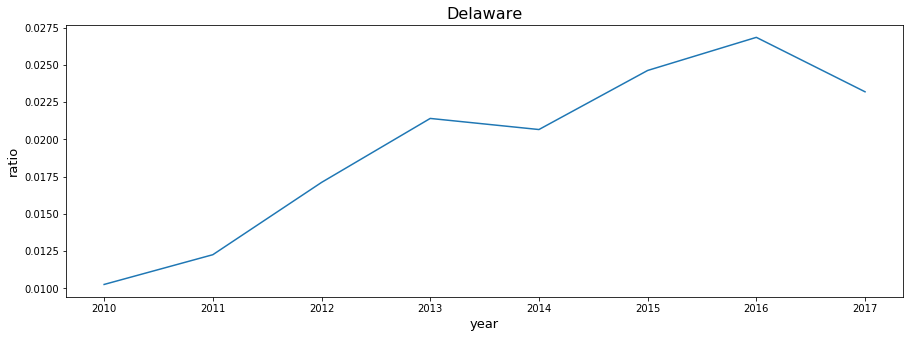

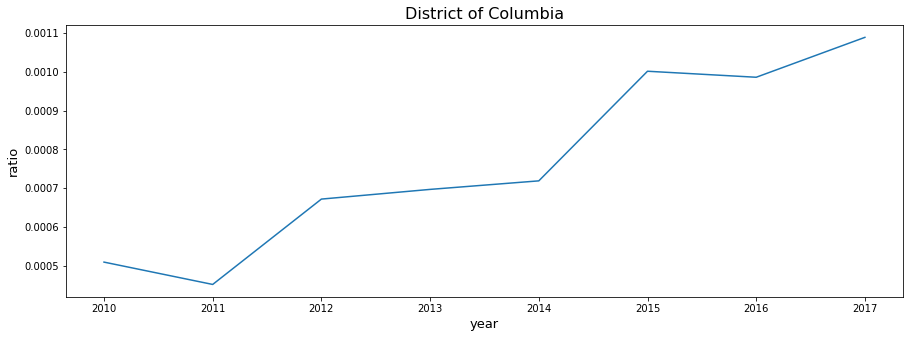

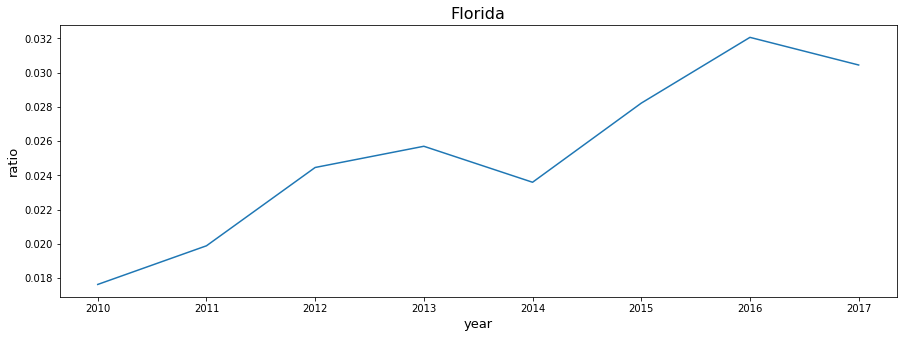

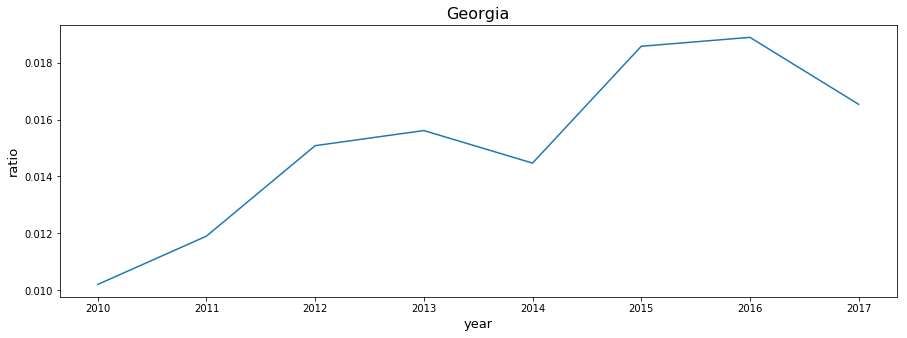

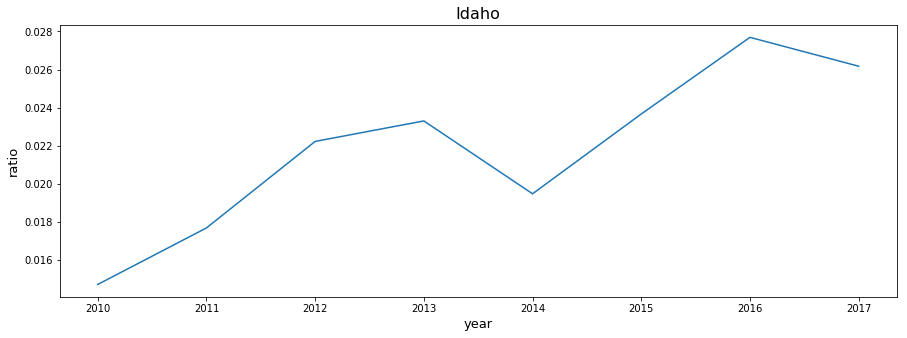

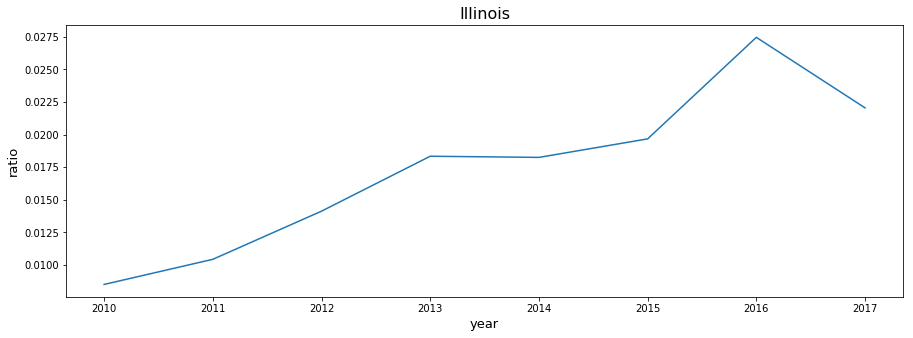

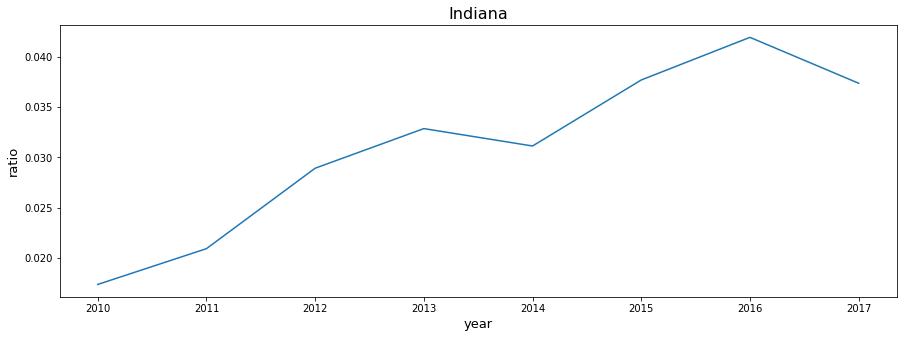

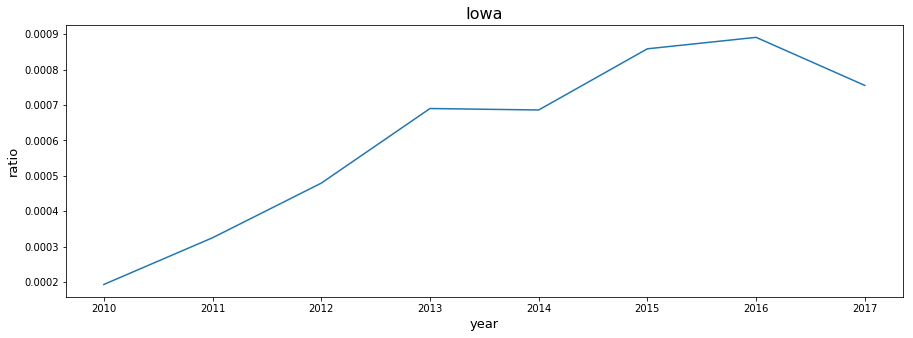

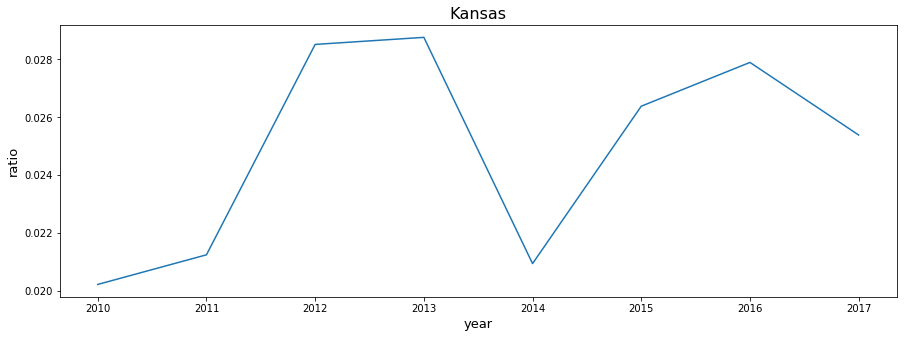

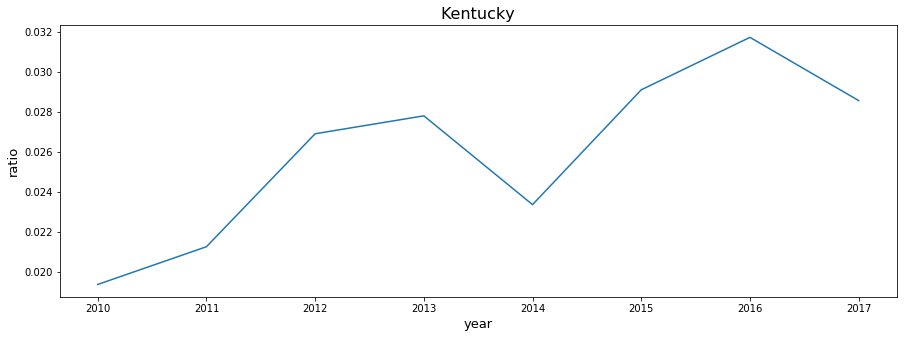

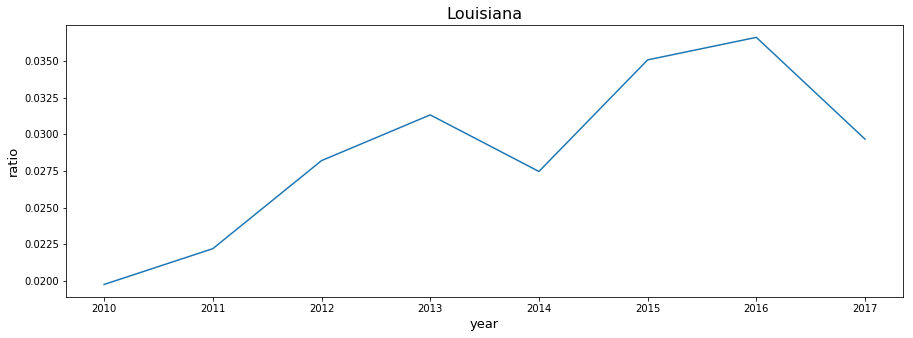

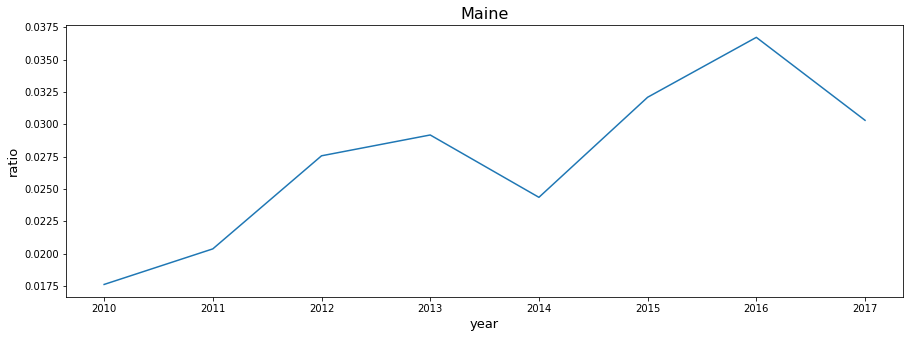

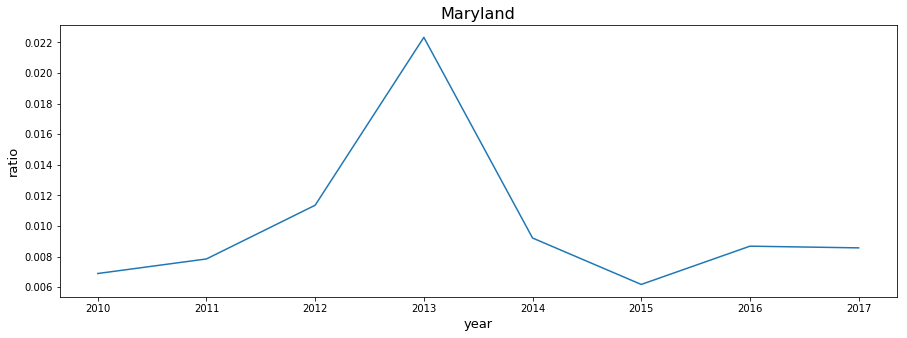

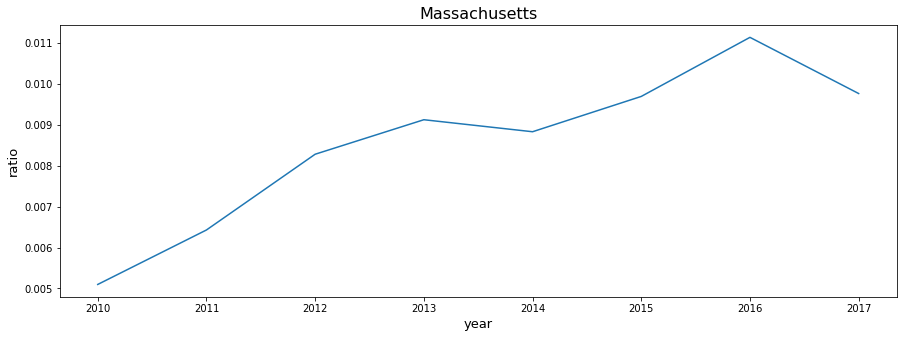

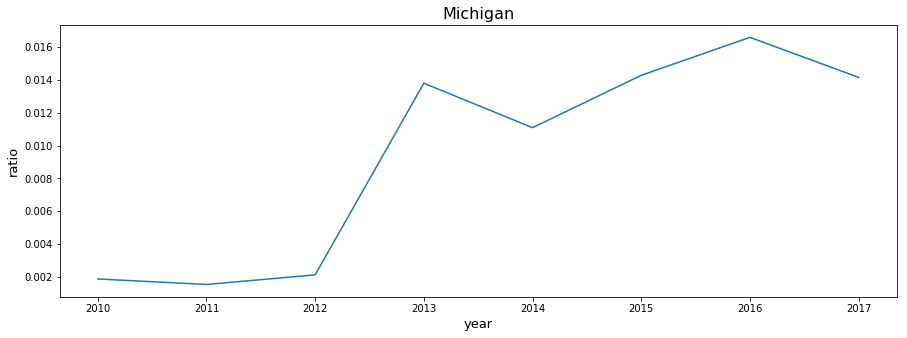

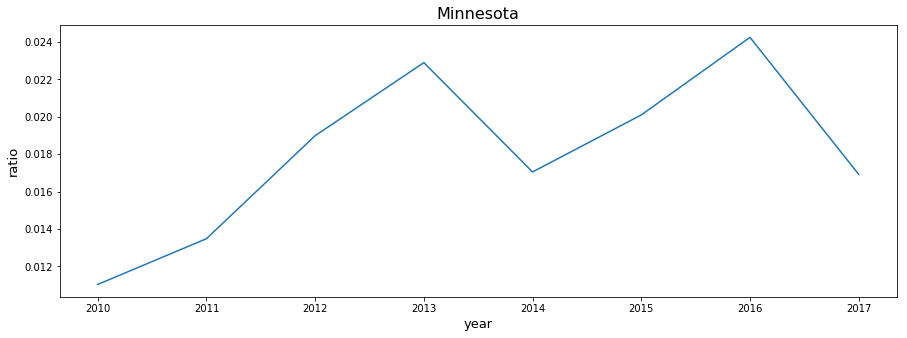

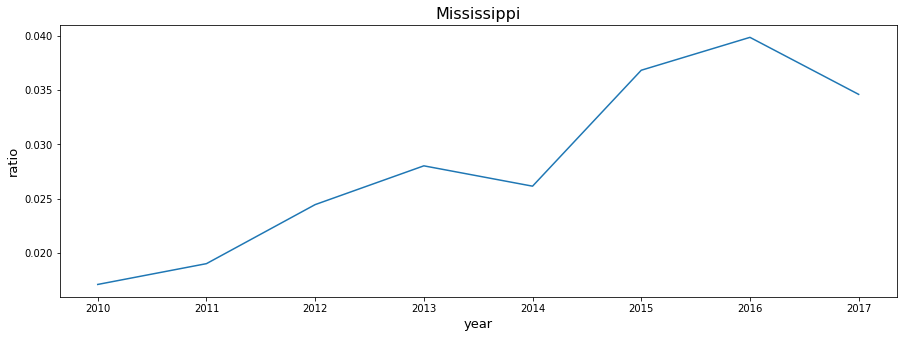

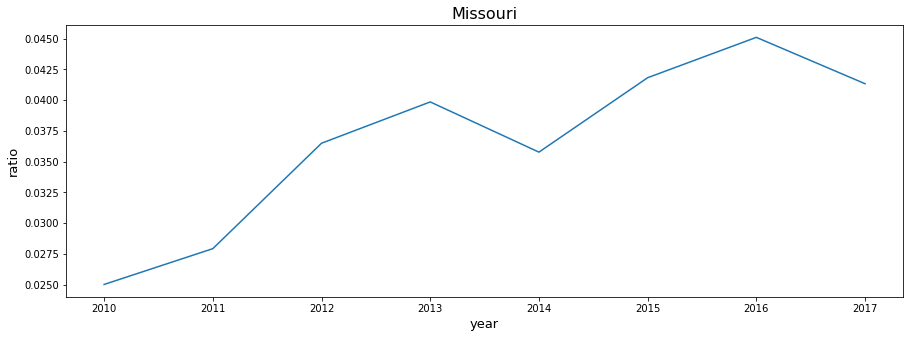

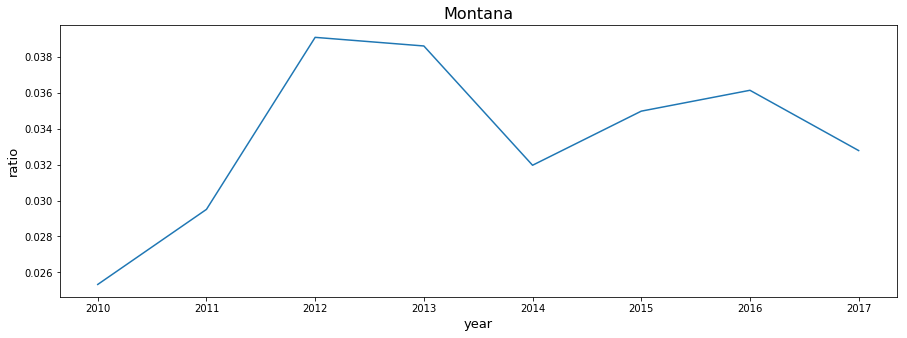

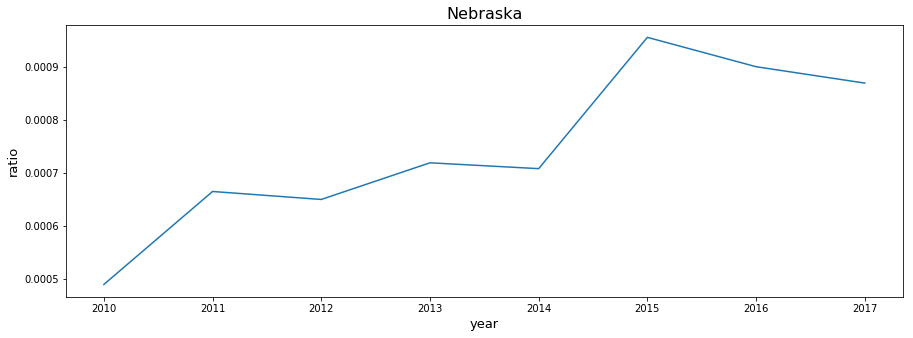

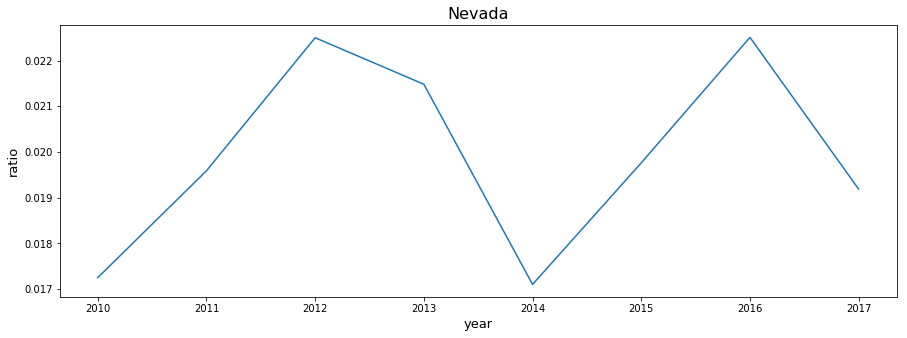

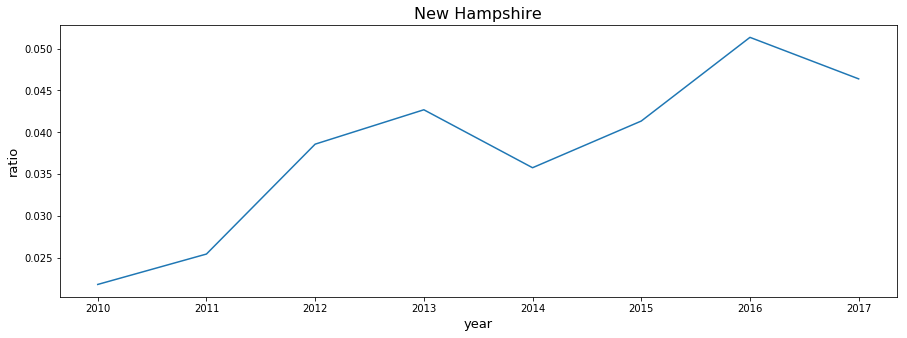

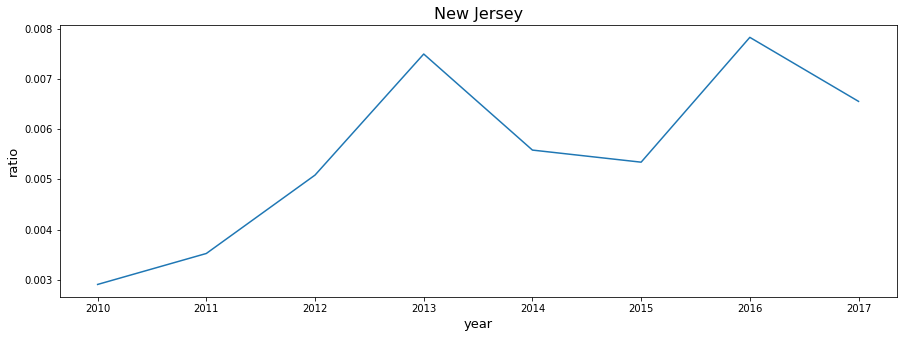

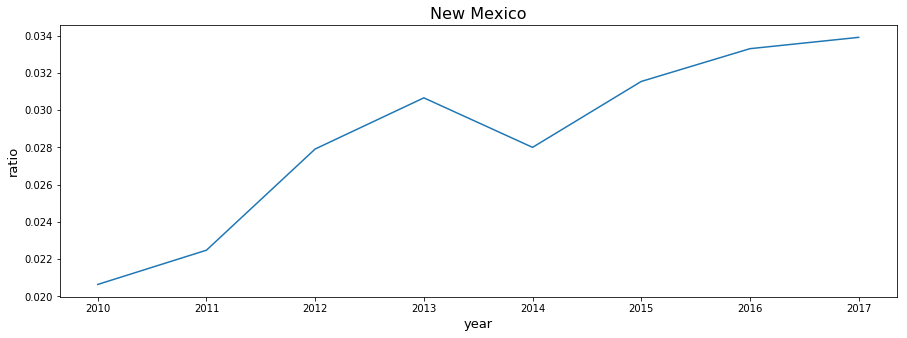

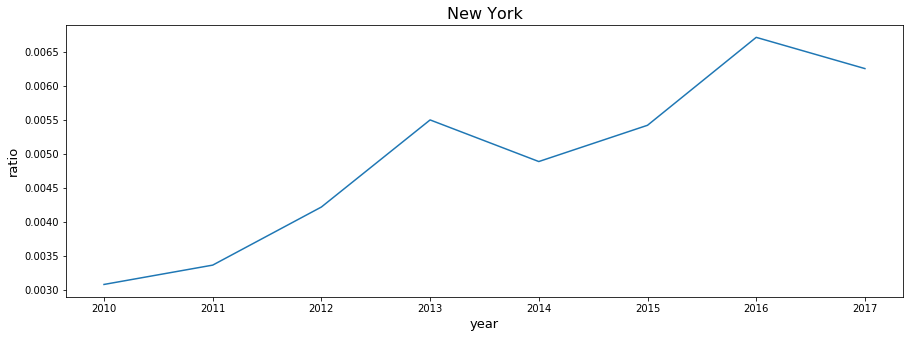

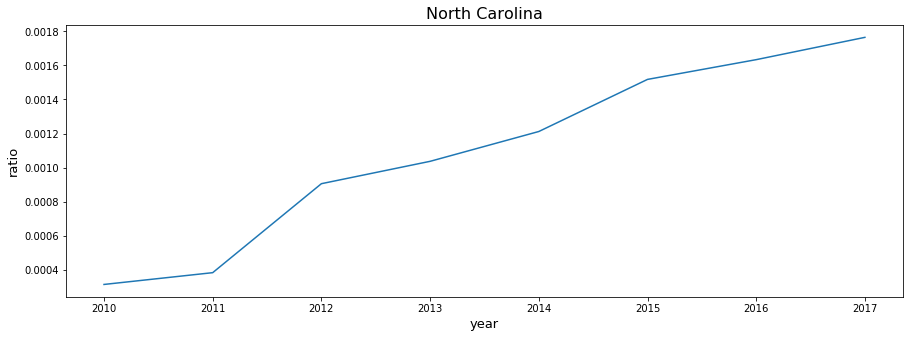

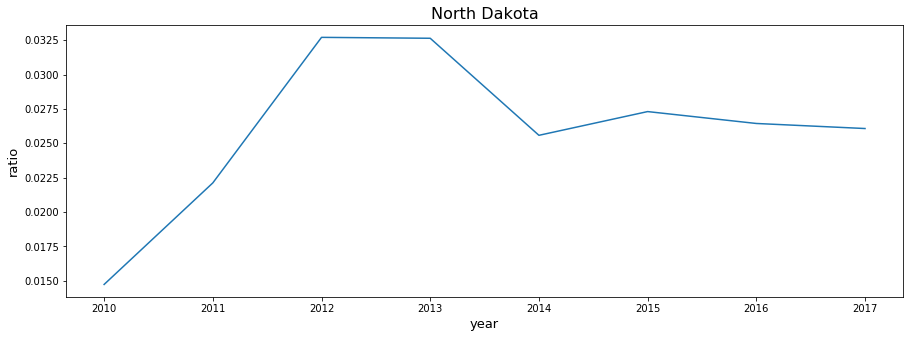

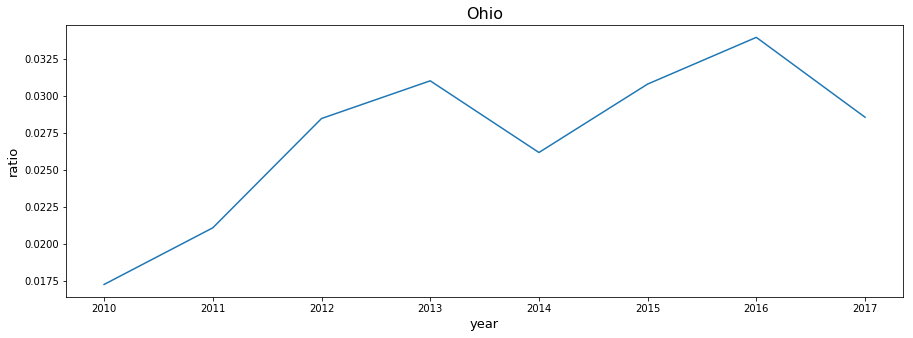

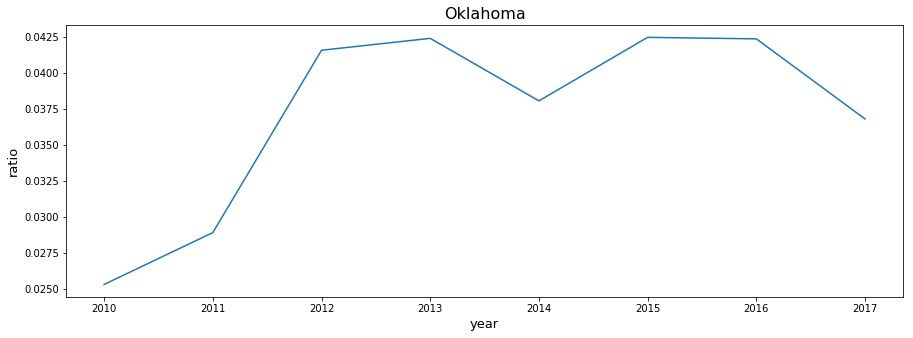

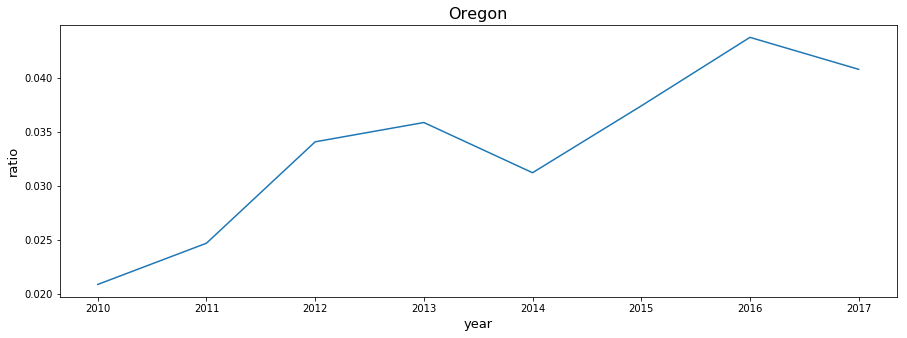

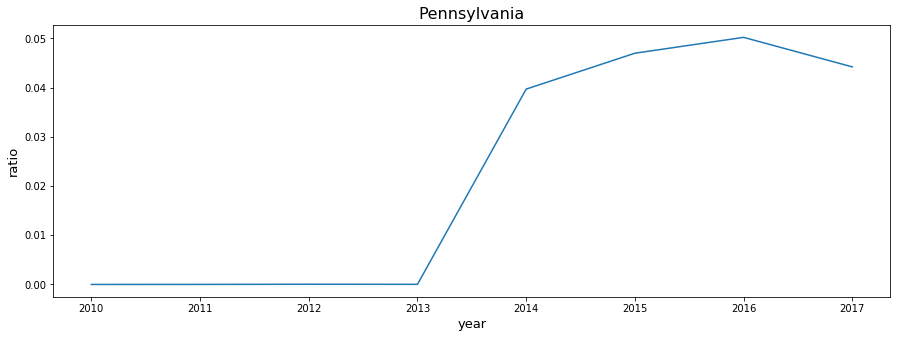

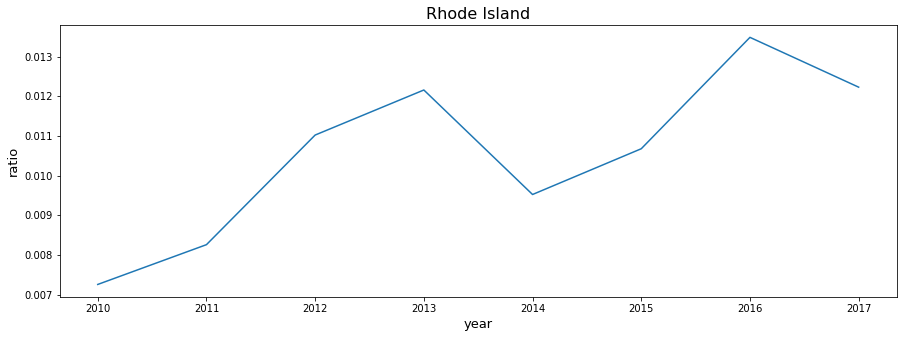

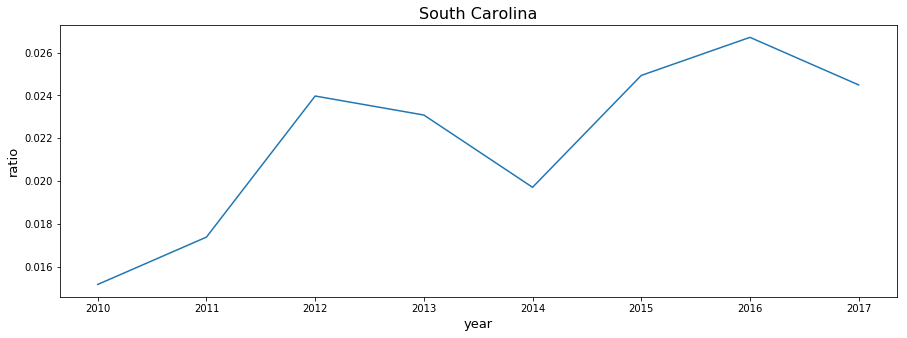

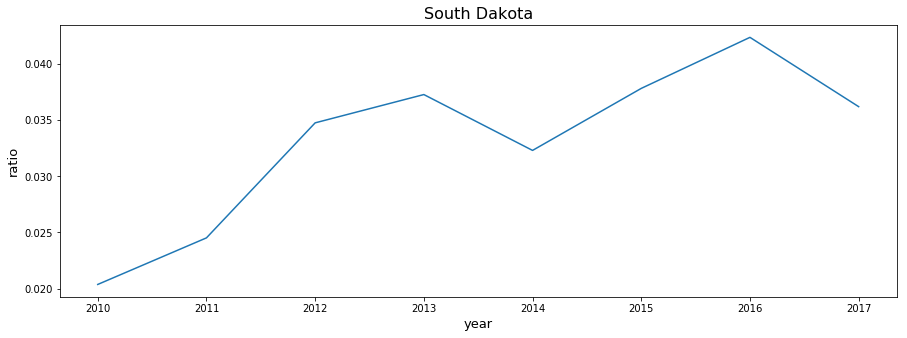

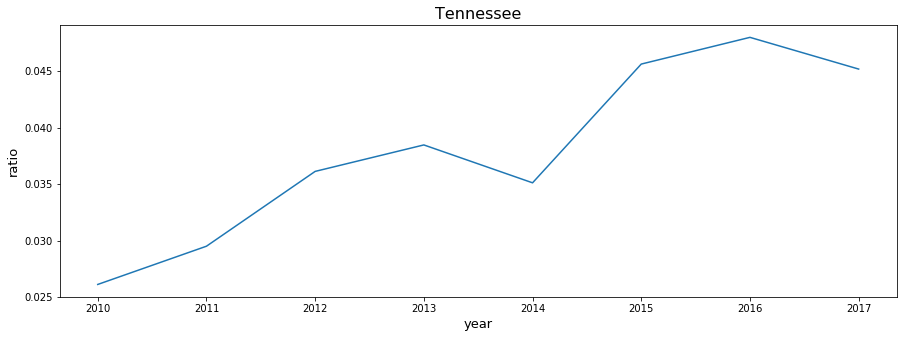

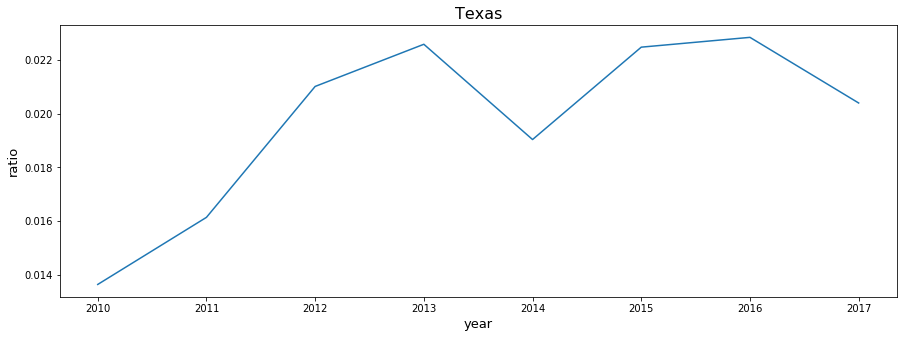

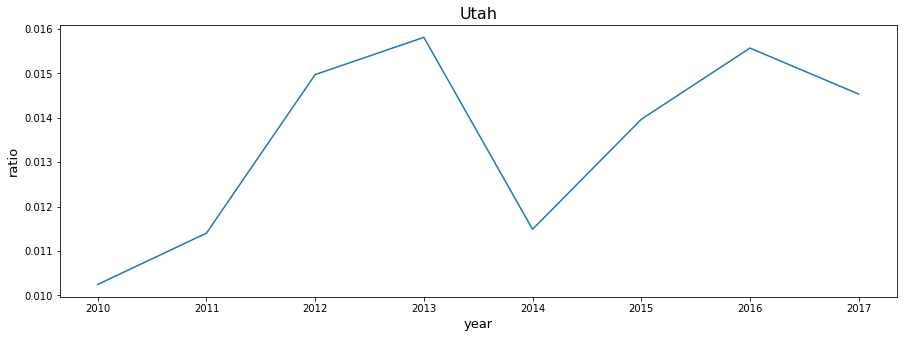

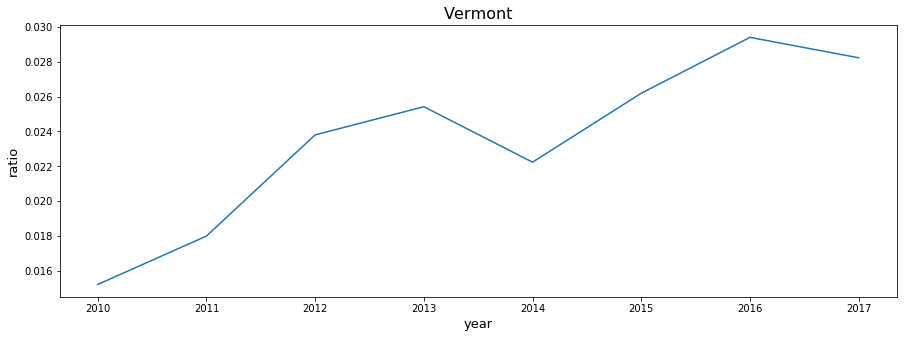

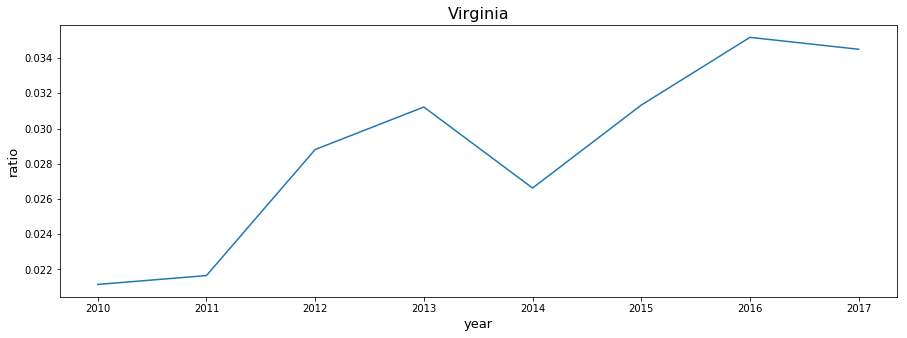

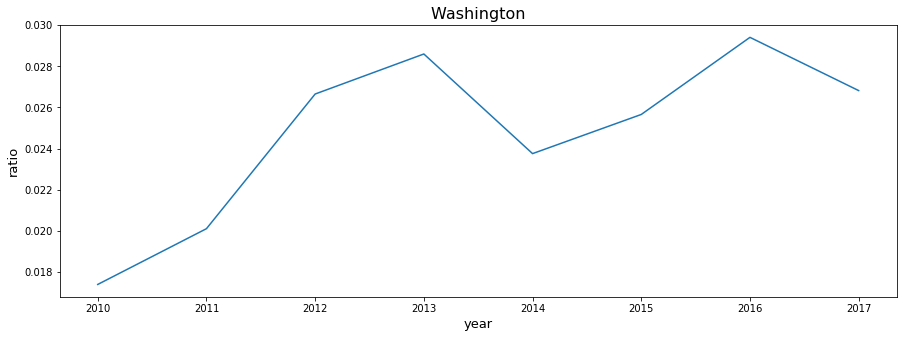

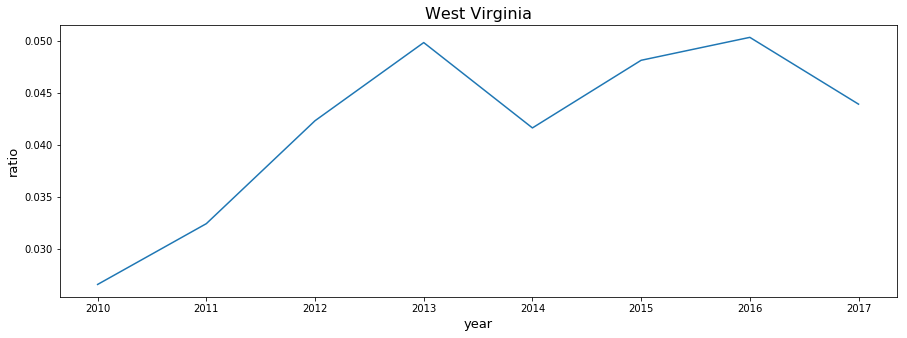

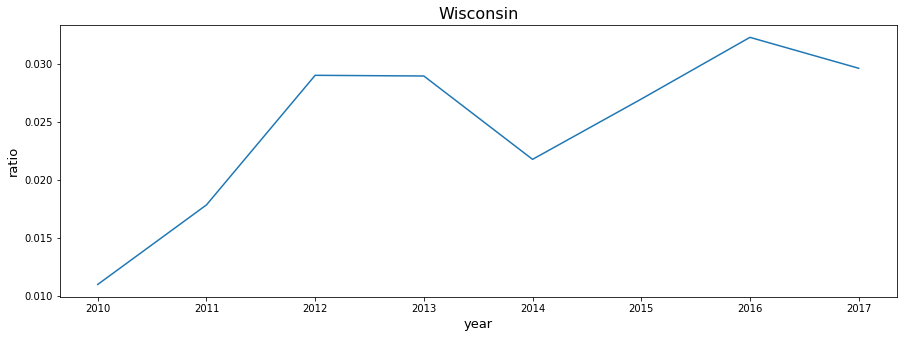

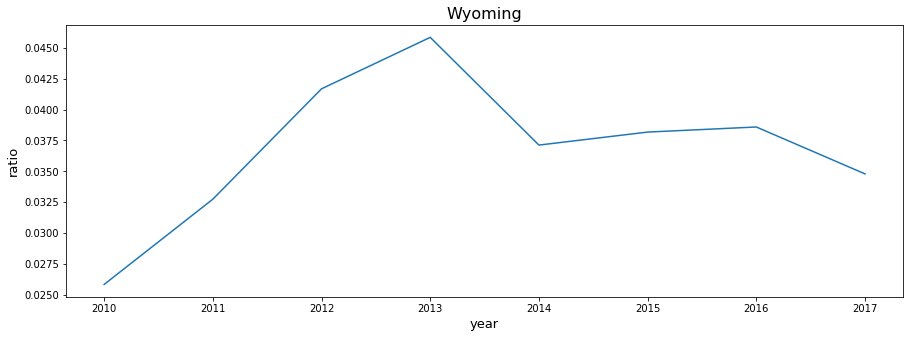

In [336]:
def plotting_state(state):
    plt.figure(figsize=(15,5))
    state.plot()
    plt.title(state.name,fontsize=16)
    plt.xlabel('year',fontsize=13)
    plt.ylabel('ratio',fontsize=13)
for e in range(len(ratio_background_checks_handgun)):
    plotting_state(ratio_background_checks_handgun.iloc[e])

As we can see handgun background checks throughout the USA are rising. The overall trend of background checks is positive. And the very first thing I noticed that sometimes the high increase or decrease appears. I read a lot of information about what's going on with gun background checks in particular years and I found out that this bursts of background checks related to new gun laws or restrictions.
I found it interesting and I wondered what happened. Everything has a causation. The gun laws in each state have differences, we can't compare a state to another state. The only thing that makes sense is to compare between years the same state.
For example, when Maryland approved one of the nation’s strictest gun-control measures in May 2013, gun sales jumped as buyers tried to beat the October deadline specified in the measure, which banned most semiautomatic rifles.

Now we are ready to answer some questions:

-Which states have had the highest growth in gun registrations?

-What is the overall trend of gun purchases?

Firstly we want to know top 10 states with the highest growth 2010-2017.
We'll create a new function which should calculate % growth. For example, 2011/2010 produce 14%, 2012/2011 produce -3% and so on.
After we'll apply the function to data frame and finally check the highest growth in gun registrations.

In [337]:
def percentage_func(series):
    return series/series.shift()*100-100

In [338]:
percentage_data_handgun=ratio_background_checks_handgun.apply(percentage_func,axis=1) #handgun
percentage_data_long_gun=ratio_background_checks_long_gun.apply(percentage_func,axis=1) #long_gun

In [339]:
print percentage_data_handgun.head(10)
print percentage_data_long_gun.head(10)

                      2010       2011       2012       2013       2014  \
Alabama                NaN  11.261328  35.394128   9.737650  -8.794112   
Alaska                 NaN   8.740596  25.236967   1.482633  -2.682675   
Arizona                NaN  20.304423  26.913308  -1.304608 -12.274698   
Arkansas               NaN   8.706598  26.661714   7.500223 -19.400287   
California             NaN  22.529835  22.752517   7.534629  20.638458   
Colorado               NaN  12.929903  22.500479  13.567959 -15.668978   
Connecticut            NaN   4.385388  27.463509   8.272517  14.171278   
Delaware               NaN  19.456698  39.585827  25.111717  -3.480904   
District of Columbia   NaN -11.332510  48.830672   3.725418   3.161314   
Florida                NaN  12.795004  22.987656   5.062424  -8.174065   

                           2015       2016       2017  
Alabama               36.351822 -37.301391 -36.347764  
Alaska                 3.728052   0.609037  -7.613378  
Arizona          

Column '2010' is NaN as expected. The column doesn't have the previous column to divide.<br>
So, I decided to delete that column.

In [340]:
percentage_data_handgun=percentage_data_handgun.dropna(axis=1, how='all')
percentage_data_long_gun=percentage_data_long_gun.dropna(axis=1, how='all')

Visualization for the percentage_data of handgun and long_gun together to compare the growth between handgun checks and long_gun checks.<br>
We're going to create a data frame which will be suitable for sns.factorplot. I've deleted Pennsylvania because the state is outlier and has 161872% growth and our barplots wouldn't show us anything(the Pennsylvania's bar would so high so the other bars would too low). Let's check what we can find out.

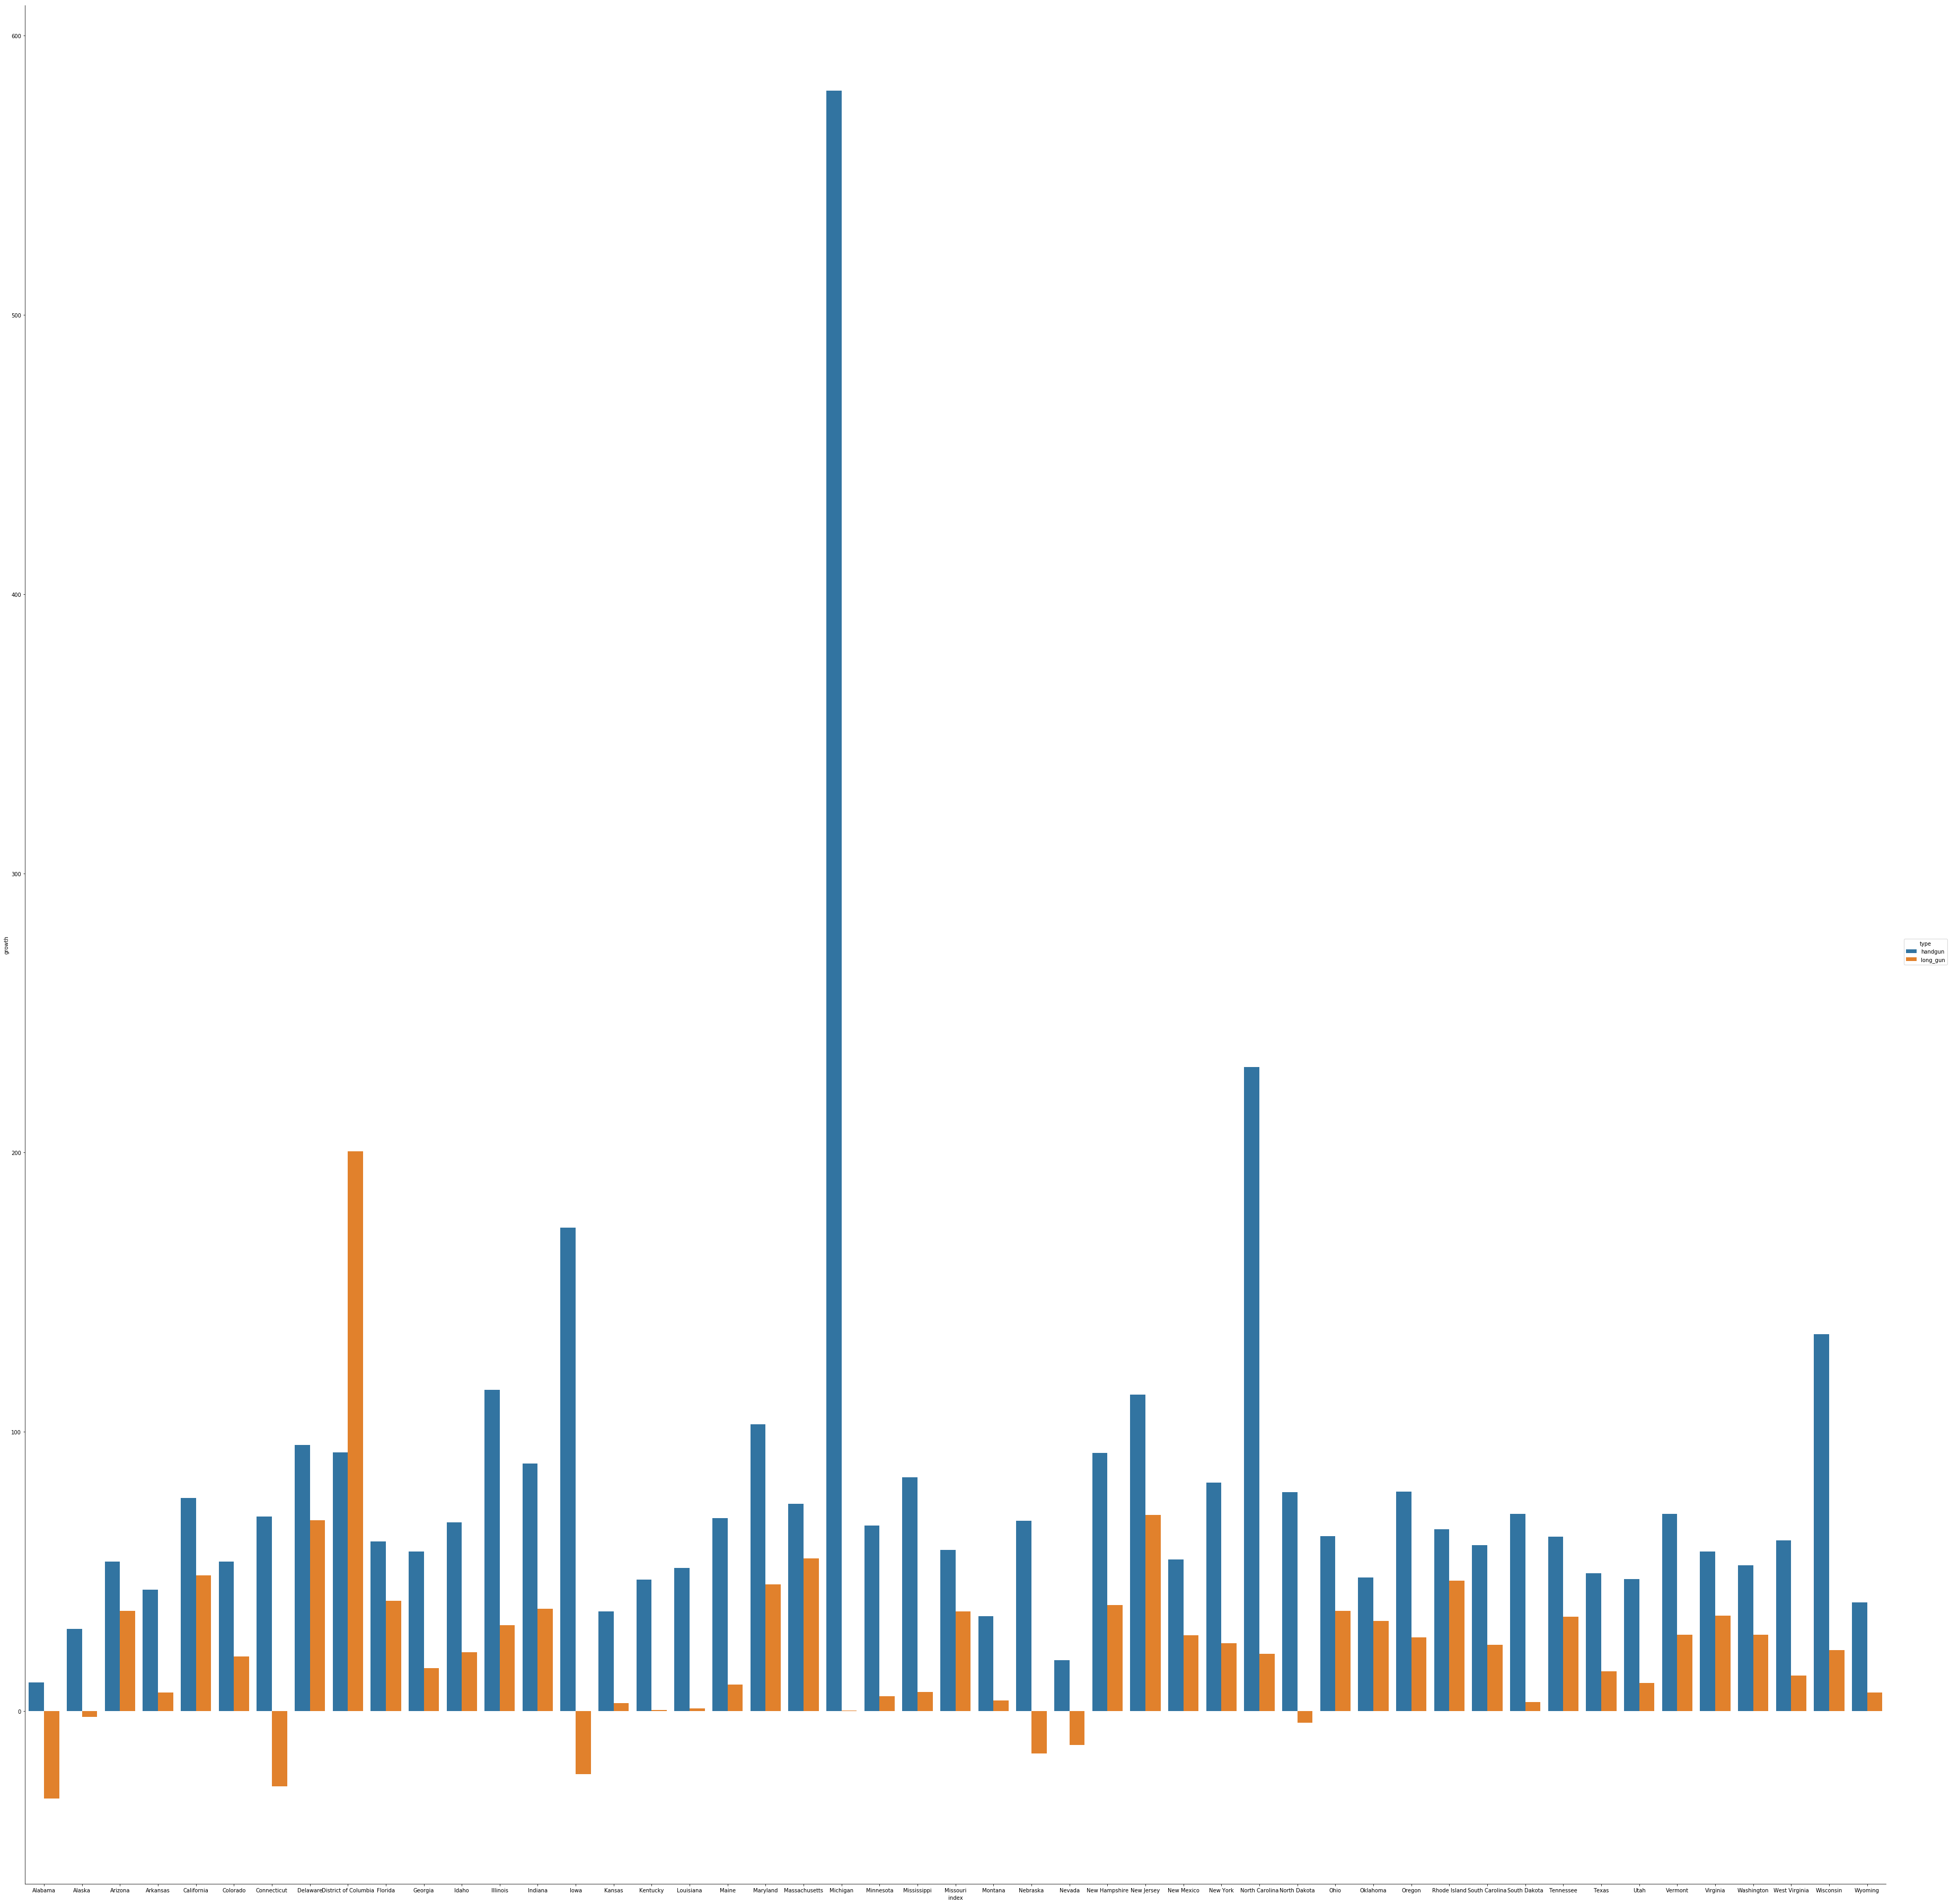

In [341]:
percentage_growth_frame=pd.DataFrame(percentage_data_handgun.sum(axis=1))
percentage_growth_frame['long_gun']=percentage_data_long_gun.sum(axis=1).values #Add values to the column "long_gun"
percentage_growth_frame=percentage_growth_frame.rename(index=str, columns={0: "handgun"}) #rename column "0" to "handgun"
percentage_growth_frame=percentage_growth_frame.drop(['Pennsylvania']) #delete "Pennsylvania" row
percentage_growth_frame=percentage_growth_frame.reset_index() 
percentage_growth_frame = pd.melt(new_df, id_vars="index", var_name="type", value_name="growth")
sns.factorplot(x='index', y='growth', hue='type', data=new_df, kind='bar',size=50)

The overall trend in growth of handgun checks are higher than long_gun checks. Only District of Columbia has the higher growth in long_gun checks checks, compare to handgun checks. We found out that throught the USA handgun background checks are rising. In my opinion barplots are a good way to show comparison. I think people buy handguns for self-defence and this trend shows more and more people decided to protect themselves.

I decided to find top 10 states which have the highest growth from 2010-2017.

In [342]:
print percentage_data_handgun.sum(axis=1).sort_values(ascending=False)
print percentage_data_long_gun.sum(axis=1).sort_values(ascending=False)

Pennsylvania            161872.302777
Michigan                   580.348123
North Carolina             230.620915
Iowa                       173.150021
Wisconsin                  135.002216
Illinois                   115.086107
New Jersey                 113.273532
Maryland                   102.660955
Delaware                    95.283824
District of Columbia        92.657062
New Hampshire               92.483994
Indiana                     88.611810
Mississippi                 83.670982
New York                    81.718180
Oregon                      78.630341
North Dakota                78.424852
California                  76.363362
Massachusetts               74.187889
Vermont                     70.655252
South Dakota                70.653497
Connecticut                 69.590111
Maine                       69.033032
Nebraska                    68.219938
Idaho                       67.525303
Minnesota                   66.366453
Rhode Island                65.035209
Ohio        

Pennsylvania has increased by 161872.3% for handguns but has the lowest growth in long_guns -37.9% since 2010. I wondered why it happened and found out that the state has the strictest gun laws, they also support their own background check system. The gun laws related to concealed carry, permit to purchase - carry a lot of weight.

-What is the overall trend of gun purchases?

To answer this question we have to convert background checks into estimated sales, we relied on a method suggested in the Small Arms Survey by Jurgen Brauer, a professor at Georgia Regents University. Each long gun and handgun check was counted as 1.1 sales. Each multiple-gun check was counted as two sales. Permit checks and other types of checks were omitted. The multiplier is an estimate based on Mr. Brauer's interviews with gun shop owners.

Creating function calculate_purchases(total_checks,start_year,end_year), total_checks can be hand_gun_total_checks,long_gun_total_checks, multiple_total_checks.

In [343]:
def calculate_purchases(total_checks,start_year,end_year):
    result=pd.DataFrame(index=months_activity['state'].unique())
    for year in range(start_year,end_year+1):
        result[year]=total_checks[year]
    return result

In [344]:
purchases_handgun=calculate_purchases(hand_gun_total_checks,1998,2017)
purchases_handgun=purchases_handgun.mul(1.1)#Each handgun check was counted as 1.1 sales
purchases_handgun.head(10)

,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Alabama,11623.7,103998.4,90181.3,92273.5,71823.4,74783.5,76925.2,84748.4,91410.0,100590.6,123913.9,131853.7,128659.3,143539.0,194962.9,214557.2,196190.5,268107.4,168435.3,107526.1
Alaska,1501.5,15772.9,13985.4,14342.9,11554.4,12255.1,14328.6,17003.8,18642.8,20172.9,25281.3,25672.9,28292.0,31120.1,39436.1,40345.8,39263.4,40794.6,41240.1,38011.6
Arizona,7872.7,85913.3,71793.7,69515.6,59216.3,54597.4,61859.6,75408.3,85209.3,81088.7,88685.3,90581.7,98078.2,119069.5,152955.0,152618.4,135712.5,163240.0,183462.4,168874.2
Arkansas,5113.9,55575.3,47803.8,44140.8,33492.8,34573.0,34193.5,37117.3,40888.1,44066.0,54360.9,60762.9,54991.2,60124.9,76429.1,82372.4,66572.0,85133.4,88268.4,79310.0
California,31505.1,409082.3,361476.5,308048.4,258633.1,174692.1,194942.0,241736.0,220942.7,215535.1,250280.8,264874.5,269674.9,333485.9,413125.9,448090.5,545558.2,525604.2,616390.5,563711.5
Colorado,8717.5,112604.8,129800.0,144404.7,73455.8,74207.1,76463.2,82500.0,87436.8,93242.6,129772.5,139311.7,143170.5,163872.5,203487.9,234493.6,200747.8,238470.1,266752.2,252678.8
Connecticut,1673.1,24612.5,8.8,10355.4,27148.0,28146.8,25044.8,27286.6,28298.6,32990.1,40957.4,51110.4,52299.5,54772.3,69927.0,75812.0,86500.7,135857.7,134612.5,79038.3
Delaware,557.7,6576.9,5442.8,5724.4,5243.7,5498.9,5474.7,6831.0,6717.7,6930.0,8604.2,10683.2,10153.0,12238.6,17252.4,21778.9,21241.0,25569.5,28131.4,24538.8
District of Columbia,0.0,20.9,18.7,13.2,6.6,12.1,15.4,20.9,59.4,28.6,205.7,391.6,338.8,308.0,469.7,498.3,522.5,741.4,742.5,831.6
Florida,12657.7,141650.3,134818.2,155269.4,142692.0,147491.3,159230.5,201072.3,235203.1,260449.2,316981.5,355779.6,365608.1,417877.9,520503.5,553741.1,516599.6,629222.0,728538.8,702831.8


Same for long_gun background checks

In [345]:
purchases_long_gun=calculate_purchases(long_gun_total_checks,1998,2017)
purchases_long_gun=purchases_long_gun.mul(1.1)#Each long_gun check was counted as 1.1 sales
purchases_long_gun.head(10)

,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Alabama,28295.3,163918.7,150443.7,148405.4,122472.9,125514.4,129461.2,131107.9,133184.7,126164.5,157848.9,161675.8,150170.9,160919.0,202479.2,223883.0,187896.5,193682.5,134159.3,94831.0
Alaska,2810.5,30569.0,28942.1,27860.8,22779.9,22423.5,24154.9,25927.0,27759.6,29194.0,36403.4,34223.2,36494.7,38067.7,44555.5,48401.1,43587.5,40009.2,40575.7,35912.8
Arizona,9102.5,78501.5,71310.8,74222.5,65896.6,62702.2,68735.7,78280.4,85263.2,75797.7,78818.3,78306.8,75973.7,89413.5,117786.9,121339.9,100194.6,102470.5,119886.8,109172.8
Arkansas,18605.4,139562.5,128573.5,122017.5,90409.0,90757.7,94023.6,95404.1,96211.5,85969.4,87667.8,84143.4,79426.6,86686.6,103992.9,104320.7,90937.0,91406.7,90332.0,84441.5
California,36781.8,451130.9,333020.6,372076.1,283055.3,230566.6,241462.1,263070.5,250780.2,210169.3,239369.9,281823.3,303003.8,353086.8,465527.7,578810.1,405909.9,377439.7,610005.0,349946.3
Colorado,16756.3,161978.3,196777.9,228780.2,121770.0,109604.0,120486.3,127820.0,129085.0,123390.3,145609.2,145938.1,142606.2,160782.6,188065.9,206818.7,171668.2,179440.8,198028.6,183693.4
Connecticut,2734.6,25146.0,4.4,14468.3,28689.1,30426.0,27549.5,27093.0,28920.1,31489.7,40758.3,44935.0,44600.6,45578.5,59391.2,63200.5,65417.0,53185.0,48194.3,28452.6
Delaware,1779.8,12558.7,11286.0,12329.9,12479.5,12245.2,12316.7,11749.1,11403.7,10247.6,10825.1,11270.6,10412.6,11739.2,15260.3,18066.4,21198.1,22047.3,23920.6,20256.5
District of Columbia,0.0,2.2,0.0,5.5,1.1,0.0,0.0,1.1,215.6,118.8,77.0,2.2,12.1,9.9,19.8,40.7,33.0,35.2,52.8,49.5
Florida,21211.3,139948.6,135213.1,156900.7,150885.9,159220.6,170866.3,187470.8,197425.8,186949.4,206784.6,215109.4,205342.5,233660.9,326472.3,359122.5,302206.3,305544.8,347855.2,306479.8


Same for multiple background checks

In [346]:
purchases_multiple=calculate_purchases(multiple_total_checks,1998,2017)
purchases_multiple=purchases_multiple.mul(2)#Each multiple check was counted as 2 sales
purchases_multiple.head(10)

,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Alabama,556,6390,6298,6980,7096,7240,7264,7952,7730,8506,11346,13574,10930,12524,18454,18540,18508,21562,13090,8586
Alaska,122,1884,1868,2094,1700,1696,1764,2104,2002,2248,3616,3860,3038,3356,4674,4898,4556,4480,4632,4494
Arizona,556,6906,5920,5702,4920,5252,6084,6534,6812,6472,8342,10076,7536,9400,13340,12678,12432,13588,15816,16240
Arkansas,378,5892,5072,5264,5090,4958,5090,5358,5298,5580,6254,6662,6290,7344,8862,8670,8172,8496,8800,8996
California,0,0,0,0,0,0,78,136,33248,382266,0,0,0,0,0,0,0,0,0,0
Colorado,1120,13410,21062,18840,9126,9140,10264,10772,10778,43430,70346,108644,56188,79750,25300,30260,22668,24830,28586,26708
Connecticut,12,136,0,948,2778,2110,2226,1946,1438,1328,1710,1416,0,0,0,0,0,0,0,0
Delaware,20,396,278,380,408,338,416,416,440,592,878,992,674,834,1202,1612,1624,1606,2068,1866
District of Columbia,0,0,0,0,0,0,0,0,4,4,4,0,0,4,8,12,12,4,16,16
Florida,694,9650,9058,11190,10334,11256,12132,13972,15784,17478,22762,31316,31082,38408,40490,42040,39634,42738,50284,49514


Now we are ready to calculate the total gun purchases per state.

In [347]:
total_gun_purchases=purchases_handgun+purchases_long_gun+purchases_multiple
total_gun_purchases

,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Alabama,40475.0,274307.1,246923.0,247658.9,201392.3,207537.9,213650.4,223808.3,232324.7,235261.1,293108.8,307103.5,289760.2,316982.0,415896.1,456980.2,402595.0,483351.9,315684.6,210943.1
Alaska,4434.0,48225.9,44795.5,44297.7,36034.3,36374.6,40247.5,45034.8,48404.4,51614.9,65300.7,63756.1,67824.7,72543.8,88665.6,93644.9,87406.9,85283.8,86447.8,78418.4
Arizona,17531.2,171320.8,149024.5,149440.1,130032.9,122551.6,136679.3,160222.7,177284.5,163358.4,175845.6,178964.5,181587.9,217883.0,284081.9,286636.3,248339.1,279298.5,319165.2,294287.0
Arkansas,24097.3,201029.8,181449.3,171422.3,128991.8,130288.7,133307.1,137879.4,142397.6,135615.4,148282.7,151568.3,140707.8,154155.5,189284.0,195363.1,165681.0,185036.1,187400.4,172747.5
California,68286.9,860213.2,694497.1,680124.5,541688.4,405258.7,436482.1,504942.5,504970.9,807970.4,489650.7,546697.8,572678.7,686572.7,878653.6,1026900.6,951468.1,903043.9,1226395.5,913657.8
Colorado,26593.8,287993.1,347639.9,392024.9,204351.8,192951.1,207213.5,221092.0,227299.8,260062.9,345727.7,393893.8,341964.7,404405.1,416853.8,471572.3,395084.0,442740.9,493366.8,463080.2
Connecticut,4419.7,49894.5,13.2,25771.7,58615.1,60682.8,54820.3,56325.6,58656.7,65807.8,83425.7,97461.4,96900.1,100350.8,129318.2,139012.5,151917.7,189042.7,182806.8,107490.9
Delaware,2357.5,19531.6,17006.8,18434.3,18131.2,18082.1,18207.4,18996.1,18561.4,17769.6,20307.3,22945.8,21239.6,24811.8,33714.7,41457.3,44063.1,49222.8,54120.0,46661.3
District of Columbia,0.0,23.1,18.7,18.7,7.7,12.1,15.4,22.0,279.0,151.4,286.7,393.8,350.9,321.9,497.5,551.0,567.5,780.6,811.3,897.1
Florida,34563.0,291248.9,279089.3,323360.1,303911.9,317967.9,342228.8,402515.1,448412.9,464876.6,546528.1,602205.0,602032.6,689946.8,887465.8,954903.6,858439.9,977504.8,1126678.0,1058825.6


Finally we have the data with total gun purchases for each state for each year. I want to see a trend of gun purchases for each state.<br>According to documentation:
<br>df.plot() Line plot with one line per column.
<br>So, I'm going to change columns to rows

In [348]:
inversed_purchases = total_gun_purchases.T
inversed_purchases.head(10)

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
1998,40475.0,4434.0,17531.2,24097.3,68286.9,26593.8,4419.7,2357.5,0.0,34563.0,...,3043.2,27431.0,85647.0,11857.3,2339.1,27905.3,12488.3,15758.2,17006.0,3740.2
1999,274307.1,48225.9,171320.8,201029.8,860213.2,287993.1,49894.5,19531.6,23.1,291248.9,...,34650.5,293897.9,723811.7,86544.6,24623.4,230886.2,133547.7,149723.2,197362.2,37512.8
2000,246923.0,44795.5,149024.5,181449.3,694497.1,347639.9,13.2,17006.8,18.7,279089.3,...,40649.1,261221.8,652845.1,74806.4,22481.0,209065.2,126973.7,142941.2,198637.0,35227.5
2001,247658.9,44297.7,149440.1,171422.3,680124.5,392024.9,25771.7,18434.3,18.7,323360.1,...,44731.0,256955.1,647641.9,75096.0,22900.7,217496.3,139635.9,148163.7,199638.1,35603.6
2002,201392.3,36034.3,130032.9,128991.8,541688.4,204351.8,58615.1,18131.2,7.7,303911.9,...,45049.2,248262.1,522338.8,68591.1,22757.3,212645.5,135184.7,117926.6,188674.9,29907.0
2003,207537.9,36374.6,122551.6,130288.7,405258.7,192951.1,60682.8,18082.1,12.1,317967.9,...,48453.6,245121.3,533291.1,70586.7,22221.7,222263.3,152693.5,114577.7,204606.0,29582.6
2004,213650.4,40247.5,136679.3,133307.1,436482.1,207213.5,54820.3,18207.4,15.4,342228.8,...,51653.4,243512.8,542628.3,72721.7,21685.4,236641.5,162735.2,115216.6,202858.8,31712.2
2005,223808.3,45034.8,160222.7,137879.4,504942.5,221092.0,56325.6,18996.1,22.0,402515.1,...,52594.3,243120.6,621297.9,80926.5,20708.9,246446.6,176403.0,117179.0,198648.4,34195.5
2006,232324.7,48404.4,177284.5,142397.6,504970.9,227299.8,58656.7,18561.4,279.0,448412.9,...,54671.6,257610.1,657275.5,95817.3,23028.2,265476.9,190076.1,122062.6,205512.6,39540.8
2007,235261.1,51614.9,163358.4,135615.4,807970.4,260062.9,65807.8,17769.6,151.4,464876.6,...,56500.9,270439.4,669877.4,96158.2,22204.4,268571.7,200811.1,117426.2,196109.6,40045.5


As expected. Now we can plot the data.

Each line will represent a trend of each state. Its is a good way to see how the trends changed from 1998 to 2017.

Text(0.5,1,u'Gun purchases of each state')

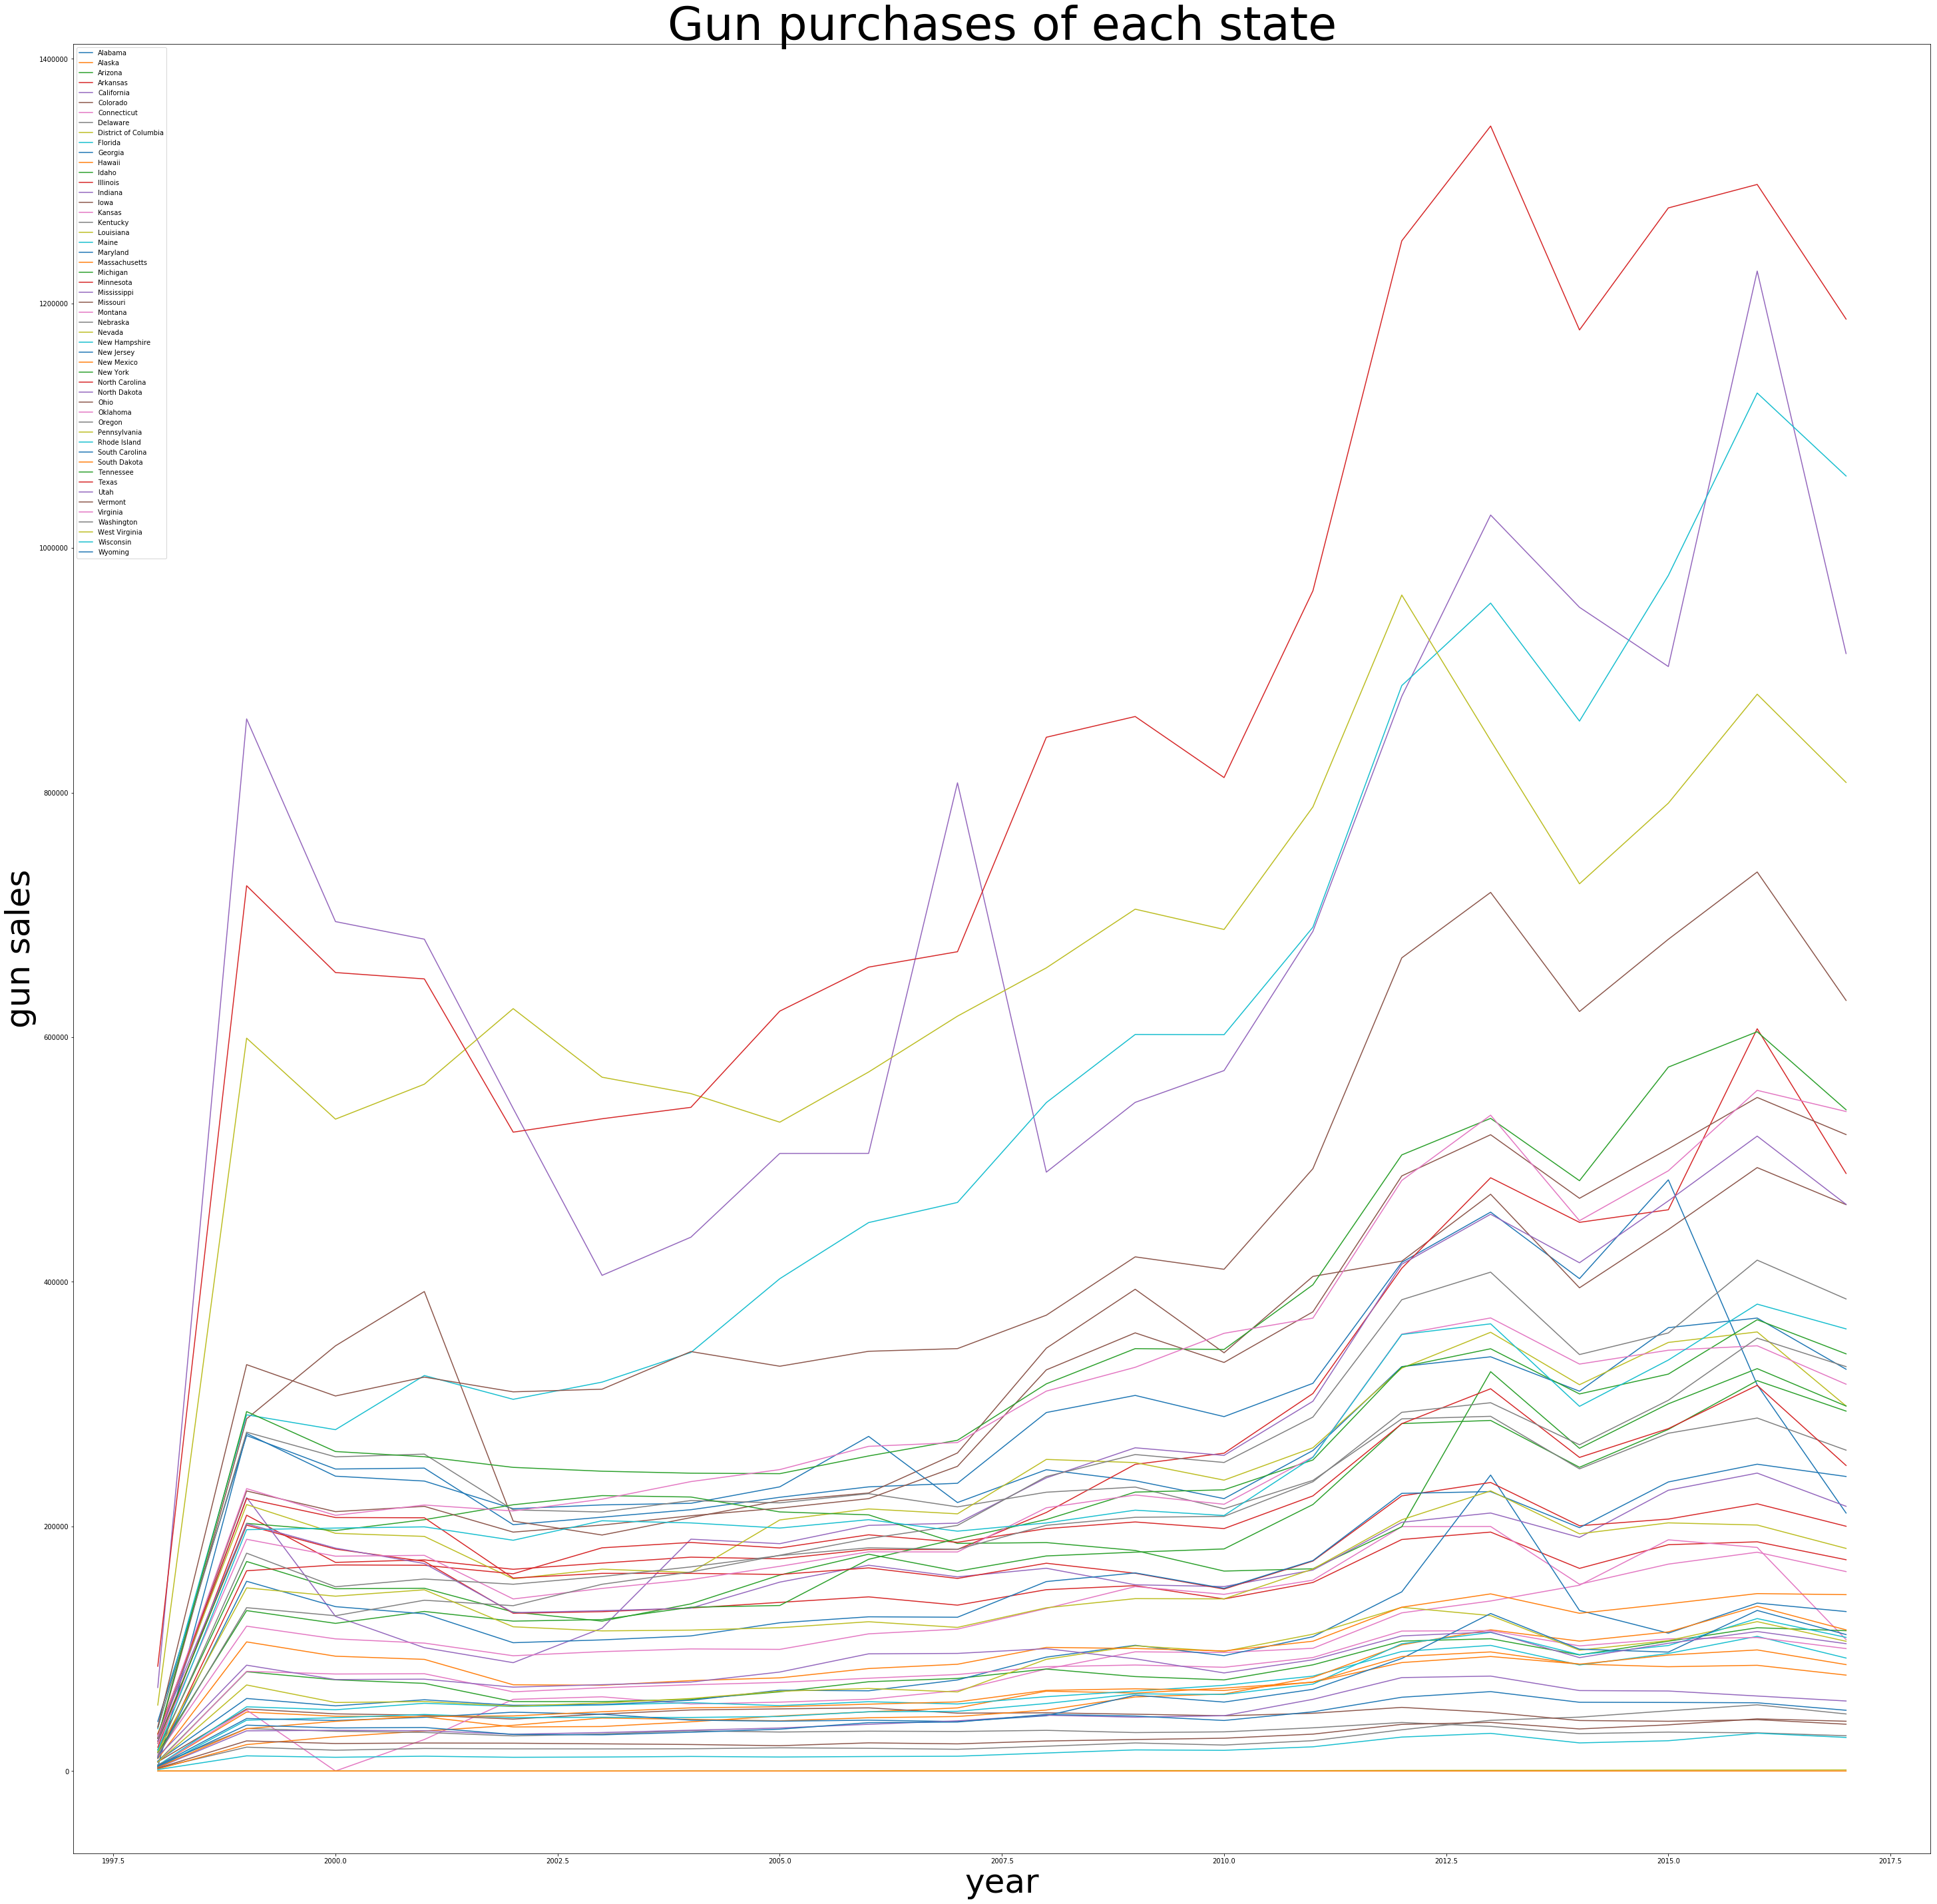

In [349]:
inversed_purchases.plot(figsize=(50,50))
plt.xlabel('year',fontsize=50)
plt.ylabel('gun sales',fontsize=50)
plt.title('Gun purchases of each state',fontsize=70)

Now we can see that 15 states have a positive trend, the other states have a stable trend. I've noticed that gun purchases in 2017 fell down for all states.

What is the overall trend of gun purchases? In order to answer this question I decided to make a plot to represent the total_gun_purchases trend in more convenient way.

Text(0.5,1,u'Gun purchases in the USA')

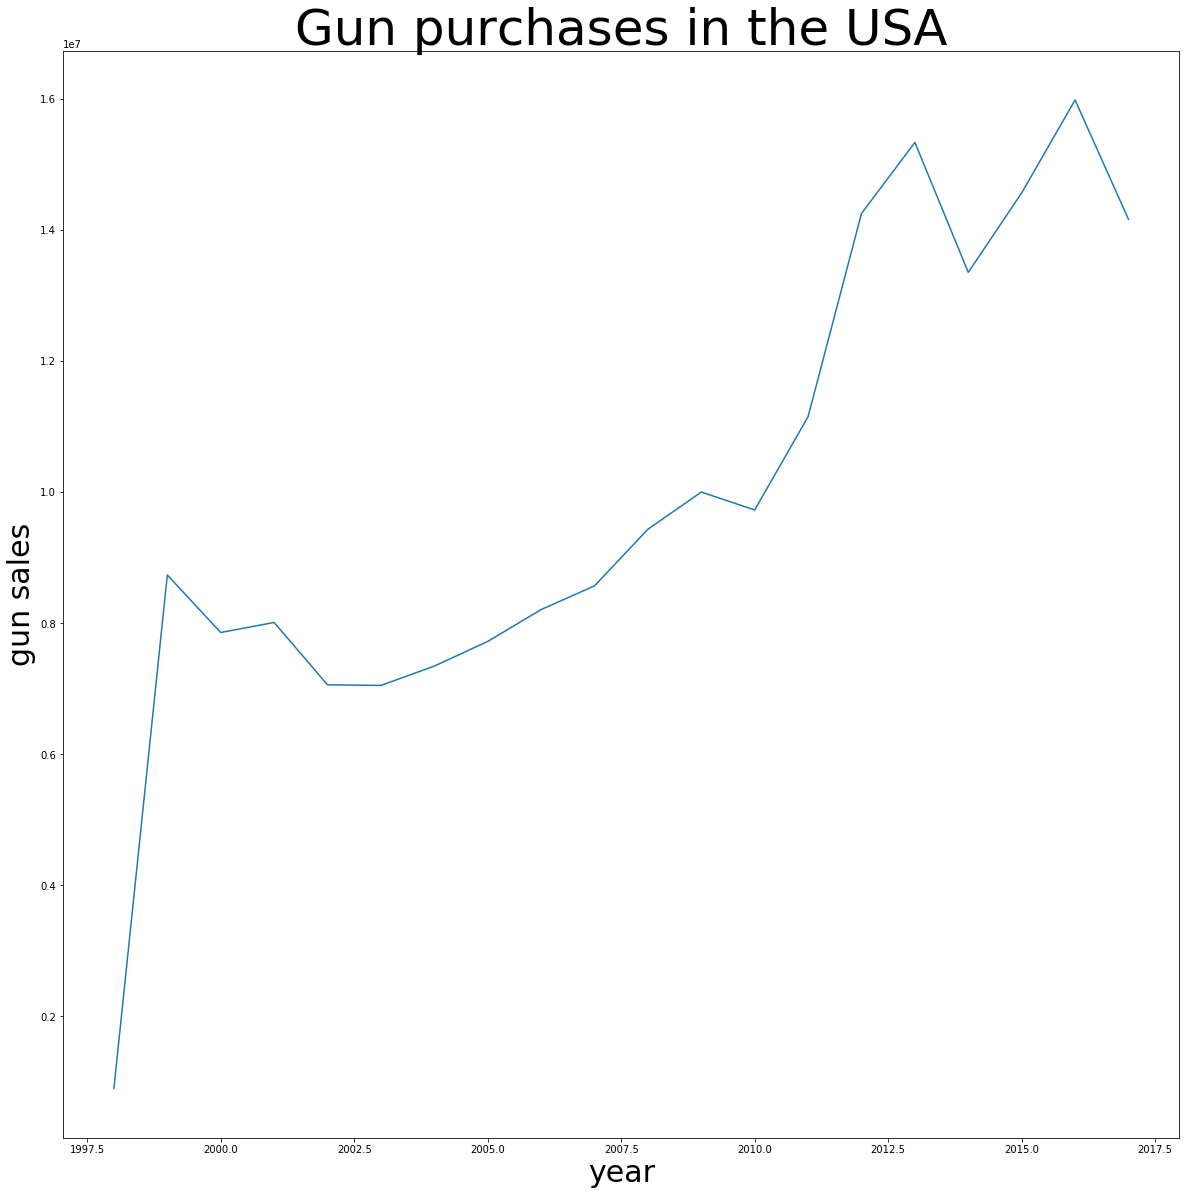

In [350]:
total_gun_purchases.sum(axis=0).plot(figsize=(20,20)) #sum of gun purchases each year
plt.xlabel('year',fontsize=30)
plt.ylabel('gun sales',fontsize=30)
plt.title('Gun purchases in the USA',fontsize=50)

The overall trend of gun purchases is positive. I've noticed that in 2012 gun purchases rised, I wondered why it happened and discovered that Mr. Obama called for new buying restrictions after the mass shooting at Sandy Hook Elementary School. And the same pattern occured in 2015 after a call from President Obama to make it harder to buy assault weapons after the terrorist attack in San Bernardino, Calif.

Now I decided to compare handgun to long_gun sales

I want to know how the trend of handgun and long_gun changed.

Text(0.5,1,u'Comparison of handgun and long gun purchases')

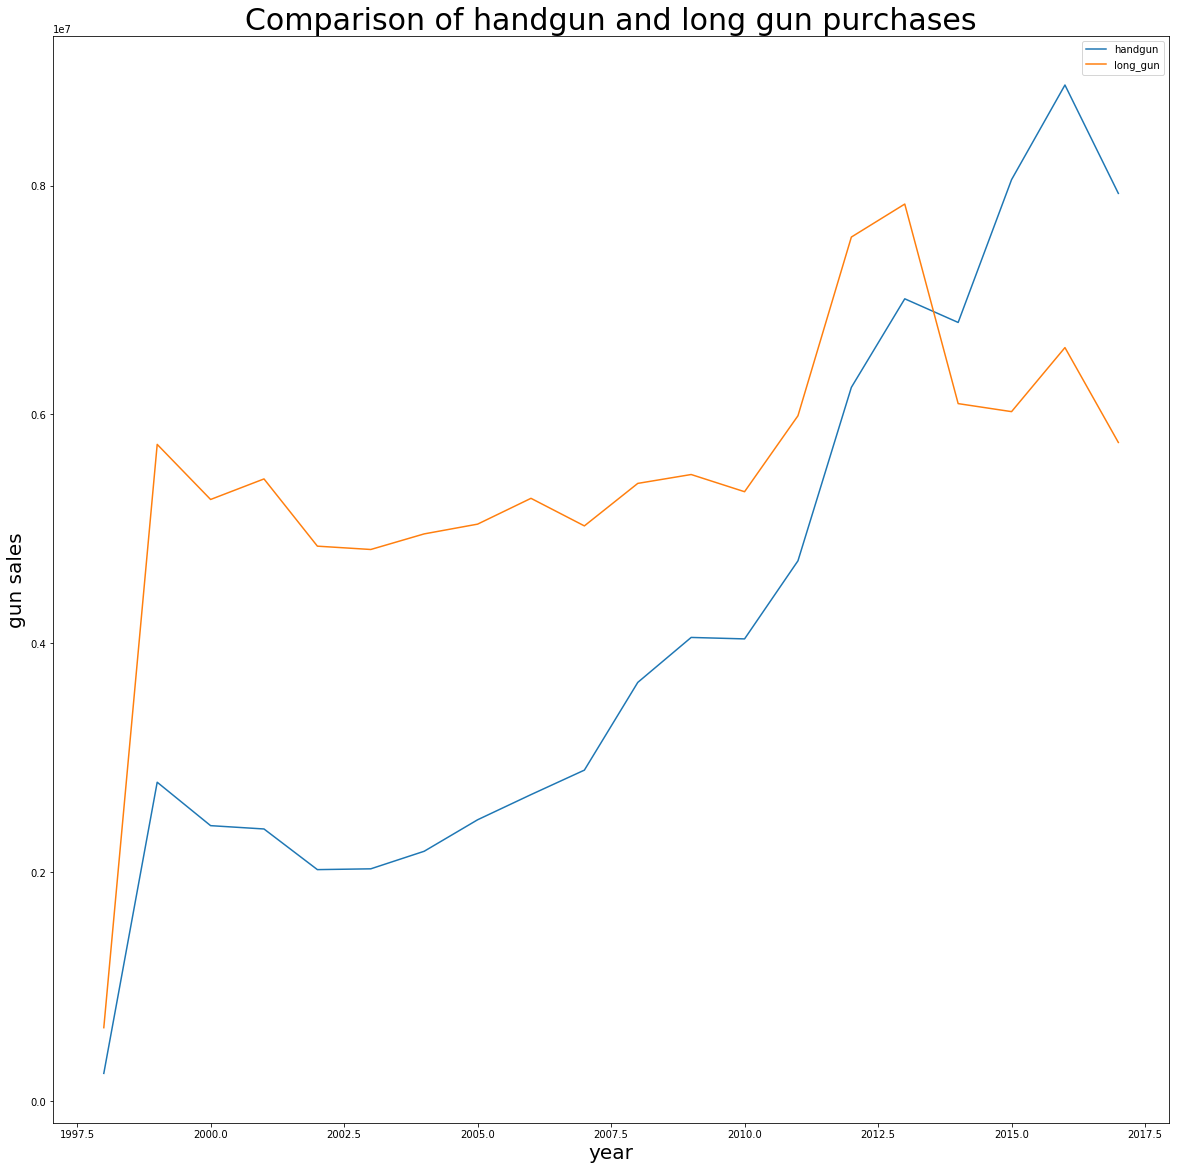

In [351]:
purchases_handgun.sum(axis=0).plot(figsize=(20,20))
purchases_long_gun.sum(axis=0).plot(figsize=(20,20))
plt.legend(['handgun', 'long_gun'])
plt.xlabel('year',fontsize=20)
plt.ylabel('gun sales',fontsize=20)
plt.title('Comparison of handgun and long gun purchases',fontsize=30)

As we can see purchases of handgun are increasing more than long_gun. The increase is mostly due to higher sales of handguns, which are typically bought for self-defense.

I decided to check states with the highest gun purchases(1998-2017)

In [352]:
total_gun_purchases.sum(axis=1).sort_values(ascending=False)

Texas                   16677859.7
California              13700154.1
Pennsylvania            13058504.3
Florida                 11512704.7
Ohio                     8727028.3
Tennessee                6992322.6
Virginia                 6561852.7
Colorado                 6535912.1
Missouri                 6426532.6
Alabama                  5615744.1
Illinois                 5547024.6
Indiana                  5258123.7
Georgia                  5143490.7
Wisconsin                4790482.1
Louisiana                4770008.0
Washington               4767332.9
Kentucky                 4701135.1
Oklahoma                 4520153.1
Michigan                 4315080.4
Oregon                   4221735.6
New York                 4212272.1
Minnesota                4127792.8
Arizona                  3843535.0
North Carolina           3570492.7
Mississippi              3386331.1
South Carolina           3145107.7
Arkansas                 3076705.1
West Virginia            2955760.0
Kansas              

Visualization for the total purchases per state.

Barplots are a good way to compare gun purchases of each state. Let's check the states with the highest amount of gun purchases.

Text(0.5,1,u'total purchases of each state')

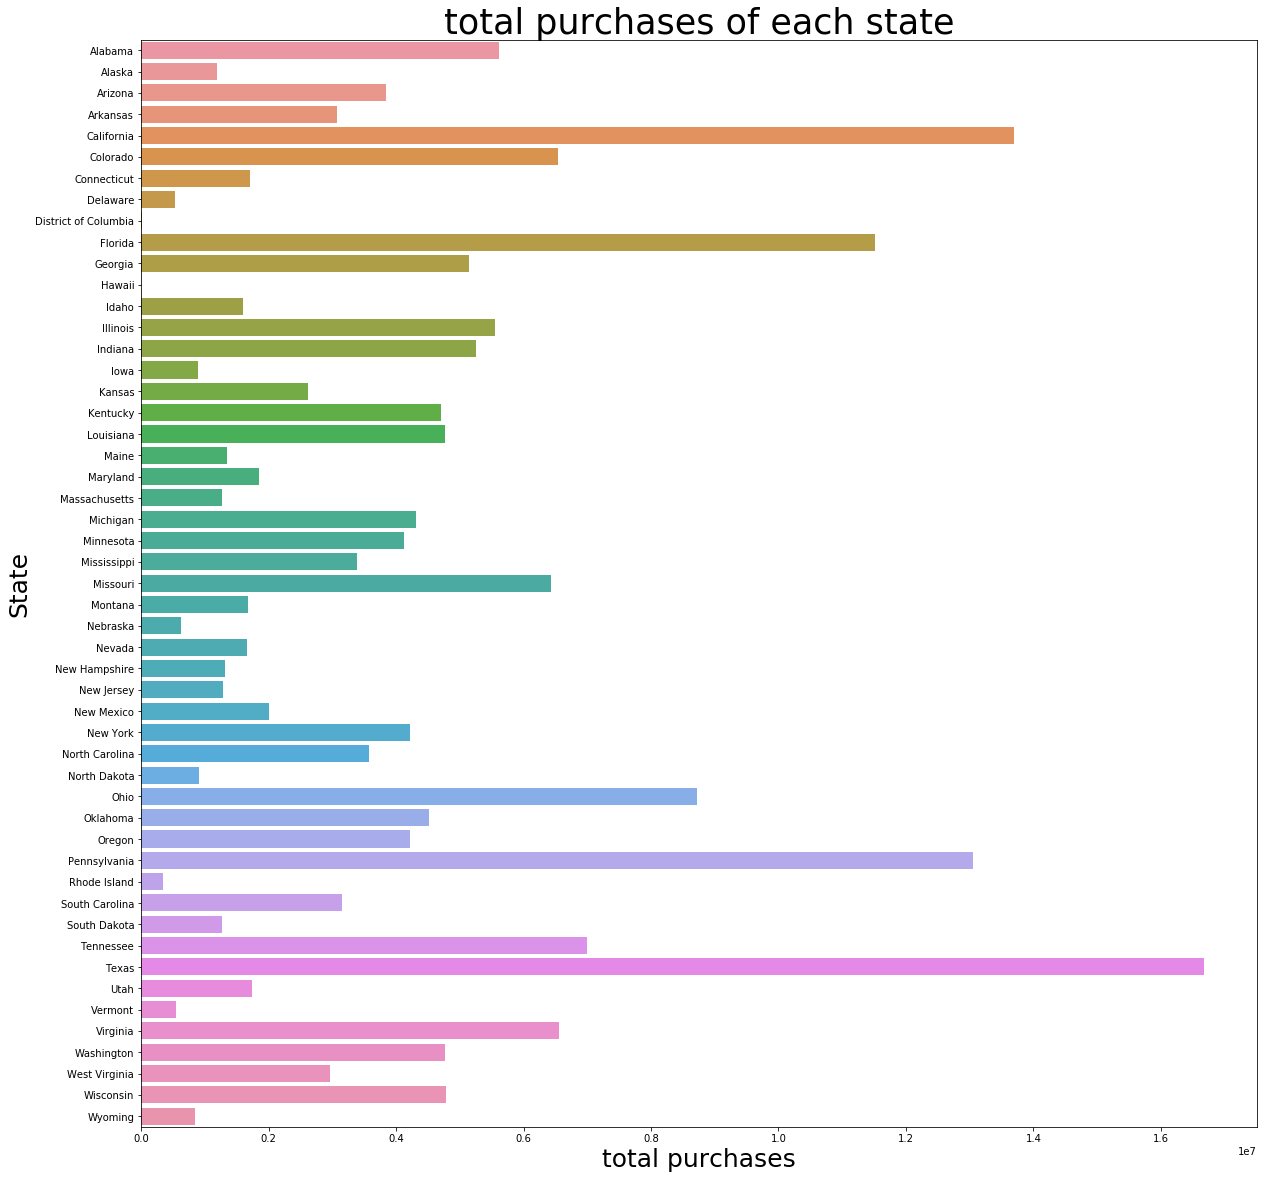

In [353]:
barplots_frame=pd.DataFrame(total_gun_purchases.sum(axis=1))
barplots_frame=barplots_frame.rename(index=str, columns={0: "total_purchases"})
barplots_frame=barplots_frame.reset_index()
fig, ax = plt.subplots(figsize=(20,20))
ax = sns.barplot(ax=ax,x='total_purchases', y='index', data=barplots_frame)
ax.set_ylabel('State',fontsize=25)
ax.set_xlabel('total purchases',fontsize=25)
ax.set_title('total purchases of each state',fontsize=35)

Texas, California, Pennsylvania, Florida, Ohio are leaders in gun purchases when Rhode Island, Wyoming, Vermont, Nebraska, Iowa, Delawere have the lowest amount of gun purchases.

What is the growth of gun purchases from 1998 to 2017?
<br> Let's check it.

In [354]:
total_gun_purchases.sum(axis=0)

1998      899926.7
1999     8731075.2
2000     7854358.0
2001     8007449.5
2002     7056507.2
2003     7046718.6
2004     7341818.4
2005     7717761.7
2006     8203966.1
2007     8565683.3
2008     9429020.5
2009     9996644.3
2010     9723535.5
2011    11147586.2
2012    14245912.9
2013    15330213.7
2014    13347932.3
2015    14559585.4
2016    15976974.6
2017    14157603.5
dtype: float64

Visuzliation. I've decided to compare gun purchases from 1998 to 2017 and find out the overall trend of gun purchases.

Text(0.5,1,u'total purchases in the USA')

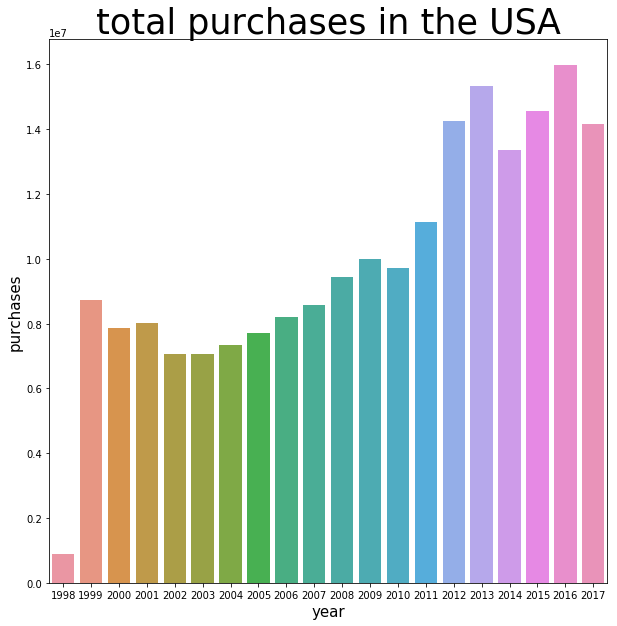

In [355]:
gun_purchases_per_year=pd.DataFrame(total_gun_purchases.sum(axis=0))
gun_purchases_per_year=gun_purchases_per_year.rename(index=str, columns={0: "total_purchases"})
gun_purchases_per_year=gun_purchases_per_year.reset_index()
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.barplot(ax=ax,x='index', y='total_purchases', data=gun_purchases_per_year)
ax.set_ylabel('purchases',fontsize=15)
ax.set_xlabel('year',fontsize=15)
ax.set_title('total purchases in the USA',fontsize=35)

The overall trend in gun purchases is positive. In 2016 almost 16 million guns were sold and 14 million in 2017. 

In [356]:
growth=total_gun_purchases.sum(axis=0)[2017]/total_gun_purchases.sum(axis=0)[1998]*100
growth

1573.1951835632835

Amazing! The growth is 1573%!<br>
Gun sales have increased almost 16 times in a decade, to about 14 million in 2017 from about 900,000 in 1998. More firearms are sold to residents in the United States than in any other country. I'm impressed.
I've also noticed is that after a call for gun restrictions, sales go up.

Unfortunately, there is no way to know how many guns were sold in the U.S.A. To understand the patterns of gun sales in the U.S., we examined the number of background checks initiated through the FBI’s National Instant Criminal Background Check System (NICS). But I faced the fact that the data are not complete. I noticed that background checks(handgun, long gun, multiple) don’t have separation, we don’t know if a background check was successful and a buyer bought a gun or NICS denied a request to purchase a gun. Same to a prepawn background checks, we can’t be sure if the background check was made because the seller decided to get back his gun or it is a new buyer and he bought that gun. We don’t even know if the background check was made for buying or selling(prepawn check). Private sales, another problem, the “40 percent” statistic, or the percentage of people who obtain a firearm without going through a background check. Harvard’s Dr. Deborah Azrael tells that of 2,072 gun owners the researchers surveyed, roughly 40 percent said they’d acquired their most recent firearm (through a sale or transfer) without going through a background check. So, we can’t take into account private sales either. We can also meet outliers, in this case we’ve noticed Pennsylvania is the outlier. Some states have too much background checks and the reason not because a lot of people decided to buy guns but because new restrictions and laws occur. So, we can’t provide the actual gun sales even using our methodology 

In my future work on the project, I want to know if the data with denied background checks 
exist and if yes, I would use it to find out the actual gun sales(the total background checks subtract denied background checks). I mentioned before that the idea to compare a state to another state is not a good idea because every state has different laws and restrictions. But we can divide the states into two groups: states with the most strictest gun laws (Gun-free state) and states with the most lenient gun laws. Then to find out if the correlation between this groups and guns sales exists. The interesting question arose, why handgun sales rose and long gun sales fell down. In future I’d like to carry out a research and investigate every state individual and compare to crime rates of each state. The interesting question to investigate : how many people, who don’t have guns, decided to buy guns?As we know a lot of people have more than 1 gun.
And the main potential area to explore: to find out if the correlation between amount of gun sales and gun violence exists or not.